# <font color=blue>Data Description</font>

The file "concrete.csv" contains important material data used in civil engineering. The concerete compressive strength - 'strength', is the target label to be analysed.

<br>**Goal**

Using the data available in file concrete.csv, apply feature engineering methods to obtain 85% to 95% accuracy  (tolerance limit 95% of the time (confidence level).

<br>**Resources Available**

The data for this project is available in file https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/


<br>***Attributes details:***

*Independent variables:*


*   cement
*   slag
*   ash
*   water
*   superplastic
*   coarseagg
*   fineagg
*   age - Concrete hardens with time and strength increases. Usually, concrete is tested after 28 days.

*Target*:
*   strength

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import scipy.stats as stat
from scipy.stats import zscore
from scipy.stats import randint as sp_randint
import statsmodels.api as sm

from sklearn.utils import resample
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
from time import time

sns.set()   # Setting Seaborn default styles

### <font color=blue>Load Concrete Data Frame </font>

In [2]:
concrete_df = pd.read_csv('concrete.csv')
concrete_df.head(10)

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   
5   255.0    0.0    0.0  192.0           0.0      889.8    945.0   90   
6   166.8  250.2    0.0  203.5           0.0      975.6    692.6    7   
7   251.4    0.0  118.3  188.5           6.4     1028.4    757.7   56   
8   296.0    0.0    0.0  192.0           0.0     1085.0    765.0   28   
9   155.0  184.0  143.0  194.0           9.0      880.0    699.0   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29  
5     21.86  
6     15.75  
7     36.64  
8     21.65  
9     28.99

In [3]:
concrete_df.tail(10)

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
1020   183.9  122.6    0.0  203.5           0.0      959.2    800.0    7   
1021   203.5  305.3    0.0  203.5           0.0      963.4    630.0    3   
1022   144.8    0.0  133.6  180.8          11.1      979.5    811.5   28   
1023   141.3  212.0    0.0  203.5           0.0      971.8    748.5    7   
1024   297.2    0.0  117.5  174.8           9.5     1022.8    753.5    3   
1025   135.0    0.0  166.0  180.0          10.0      961.0    805.0   28   
1026   531.3    0.0    0.0  141.8          28.2      852.1    893.7    3   
1027   276.4  116.0   90.3  179.6           8.9      870.1    768.3   28   
1028   342.0   38.0    0.0  228.0           0.0      932.0    670.0  270   
1029   540.0    0.0    0.0  173.0           0.0     1125.0    613.0    7   

      strength  
1020     10.79  
1021      9.56  
1022     13.20  
1023     10.39  
1024     21.91  
1025     13.29  
1026     41.30  
1027     44.28  
1028     55.06  
1029     52.61

In [4]:
df = concrete_df.copy()   # Take the backup of original copy and keep working on this copy

**Observations:**
* There are 8 independent attributes ( cement, slag, ash, water, superplastic, coarseagg, fineagg, age) and one dependent variable (strength).
* All the records are numeric.

# <font color=blue>1. Exploratory Data Analysis (EDA) </font>

*   Find the shape of the data, data type of individual columns
*   Check the presence of missing values
*   Descriptive stats of numerical columns
*   Find the distribution of numerical columns and the asssociated skeweness and presence of outliers
*   Distribution of categorical columns

### <font color=blue>1.1 Univarient Analysis</font>

This section involves finding,
* attribute types
* number of records and number of attributes
* Central tendency of attributes

In [5]:
print ('Information of all columns within the dataframe: ')
print (df.info())

print ('************************************************************************************\n')

print('Shape of the attributes: ')
print (df.shape)

print ('************************************************************************************\n')
print('types of the attributes: ')
print (df.dtypes)

print ('************************************************************************************\n')
df.apply(lambda x: len(x.unique())) # To check whether any dependent attributes are categorical

Information of all columns within the dataframe: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB
None
************************************************************************************

Shape of the attributes: 
(1030, 9)
************************************************************************************

types of the attributes: 
cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float6

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

In [6]:
# Checking Missing values
temp_df = df[df.isna().any(axis=1)].count()
if temp_df['age'] == 0:
    print ('No missing values')
else:
    print ('There are missing values')
    print (temp_df)
    
# Verify which of the columns has the -Ve values
for col in df.columns.tolist():
    number_of_exp_with_neg = df[df[col] <0].shape[0]
    if (df[df[col] <0][col].count() == 0):
        print ('No -Ve values in attribute: ' + col)
    else:
        print ('{0} attribute has {1} -ve values'.format(col, str(number_of_exp_with_neg)))

No missing values
No -Ve values in attribute: cement
No -Ve values in attribute: slag
No -Ve values in attribute: ash
No -Ve values in attribute: water
No -Ve values in attribute: superplastic
No -Ve values in attribute: coarseagg
No -Ve values in attribute: fineagg
No -Ve values in attribute: age
No -Ve values in attribute: strength


**Observations:** 

*   There are no missing values in any of the columns.
*   All attributes are continuous type.
*   All attributes are float type, except age (age is of integer type). 
*   None of the attibute has any negative values.
*   There are 1030 records in the dataframe.
*   No string present for any of the attribute values.

### <font color=blue>Checking the Central tendency</font>

In [7]:
df.describe().T

count        mean         std     min      25%      50%  \
cement        1030.0  281.167864  104.506364  102.00  192.375  272.900   
slag          1030.0   73.895825   86.279342    0.00    0.000   22.000   
ash           1030.0   54.188350   63.997004    0.00    0.000    0.000   
water         1030.0  181.567282   21.354219  121.80  164.900  185.000   
superplastic  1030.0    6.204660    5.973841    0.00    0.000    6.400   
coarseagg     1030.0  972.918932   77.753954  801.00  932.000  968.000   
fineagg       1030.0  773.580485   80.175980  594.00  730.950  779.500   
age           1030.0   45.662136   63.169912    1.00    7.000   28.000   
strength      1030.0   35.817961   16.705742    2.33   23.710   34.445   

                   75%     max  
cement         350.000   540.0  
slag           142.950   359.4  
ash            118.300   200.1  
water          192.000   247.0  
superplastic    10.200    32.2  
coarseagg     1029.400  1145.0  
fineagg        824.000   992.6  
age             56.000   365.0  
strength        46.135    82.6


**Observations:**
*   cement, water, coarseagg, fineagg,strength: There is not much difference in mean and median (50%). 
*   Attributes: slag and ash, age, there is much difference in mean and 50% values, indicating mean > median, so being a right skewness in data.
*   Minimum values of slag, ash and superplastic are '0', hoping these values cannot be accepted in estimating the concrete strength.
*   Min value should be less than std, however 'cement' has 'min' and 'std' are almost same. And for 'water, coarseagg, fineagg' std is much lesser than 'min. Hence these attributes needs to be deep-dived.

***Let's strong the above observations by using visualization techniques.***

### <font color=blue>Checking Skewness and Outliers</font>

In [8]:
# Function is to find the skewness of Quantitative attributes
def findSkewness(quant_value, col):
    if (quant_value.loc[.50] - quant_value.loc[.25]) > (quant_value.loc[.75] - quant_value.loc[.50]):
        print('\'' + col + '\' is left-skewed')
    elif (quant_value.loc[.50] - quant_value.loc[.25]) < (quant_value.loc[.75] - quant_value.loc[.50]):
        print('\'' + col +'\' is right-skewed')
    else:
        print('\'' + col + '\' Attribute data distribution is symmetric')

# Finding the outliers
# IQR = Q3 - Q1
# Q1 − 1.5 IQR or above Q3 + 1.5 IQR.
def findOutliers(quant_value, col):
    Q1 = quant_value[.25]
    Q3 = quant_value[.75]
    IQR = Q3 - Q1
    outlier_left = (Q1 - 1.5 * IQR)
    outlier_right = (Q3 + 1.5 * IQR)
    number_of_outliers = (concrete_df[(concrete_df[col] <= outlier_left) | (concrete_df[col] >= outlier_right)][col].count())
    print("Number of Outliers data in", col, ": " + str(number_of_outliers))

df_quant=df[:].quantile([.25,.50,.75])
cols = df.columns.tolist()
for col in cols: 
    findSkewness (df_quant[col], col)
print('**********************************************************************')
for col in cols: 
    findOutliers(df_quant[col], col)

'cement' is left-skewed
'slag' is right-skewed
'ash' is right-skewed
'water' is left-skewed
'superplastic' is left-skewed
'coarseagg' is right-skewed
'fineagg' is left-skewed
'age' is right-skewed
'strength' is right-skewed
**********************************************************************
Number of Outliers data in cement : 0
Number of Outliers data in slag : 2
Number of Outliers data in ash : 0
Number of Outliers data in water : 9
Number of Outliers data in superplastic : 10
Number of Outliers data in coarseagg : 0
Number of Outliers data in fineagg : 5
Number of Outliers data in age : 59
Number of Outliers data in strength : 4


**Note:**</br>
None of the attributes are categorical, hence no need of any transformations are not applicable.

### <font color=blue>Univariant Visualizations</blue>

Points to note:
* This involves, individual attribute (all attributes are continuous in nature) visual distribution inspection.
* Is there any clusters involves in the distribution
* Visual inspection of outliers and skewness

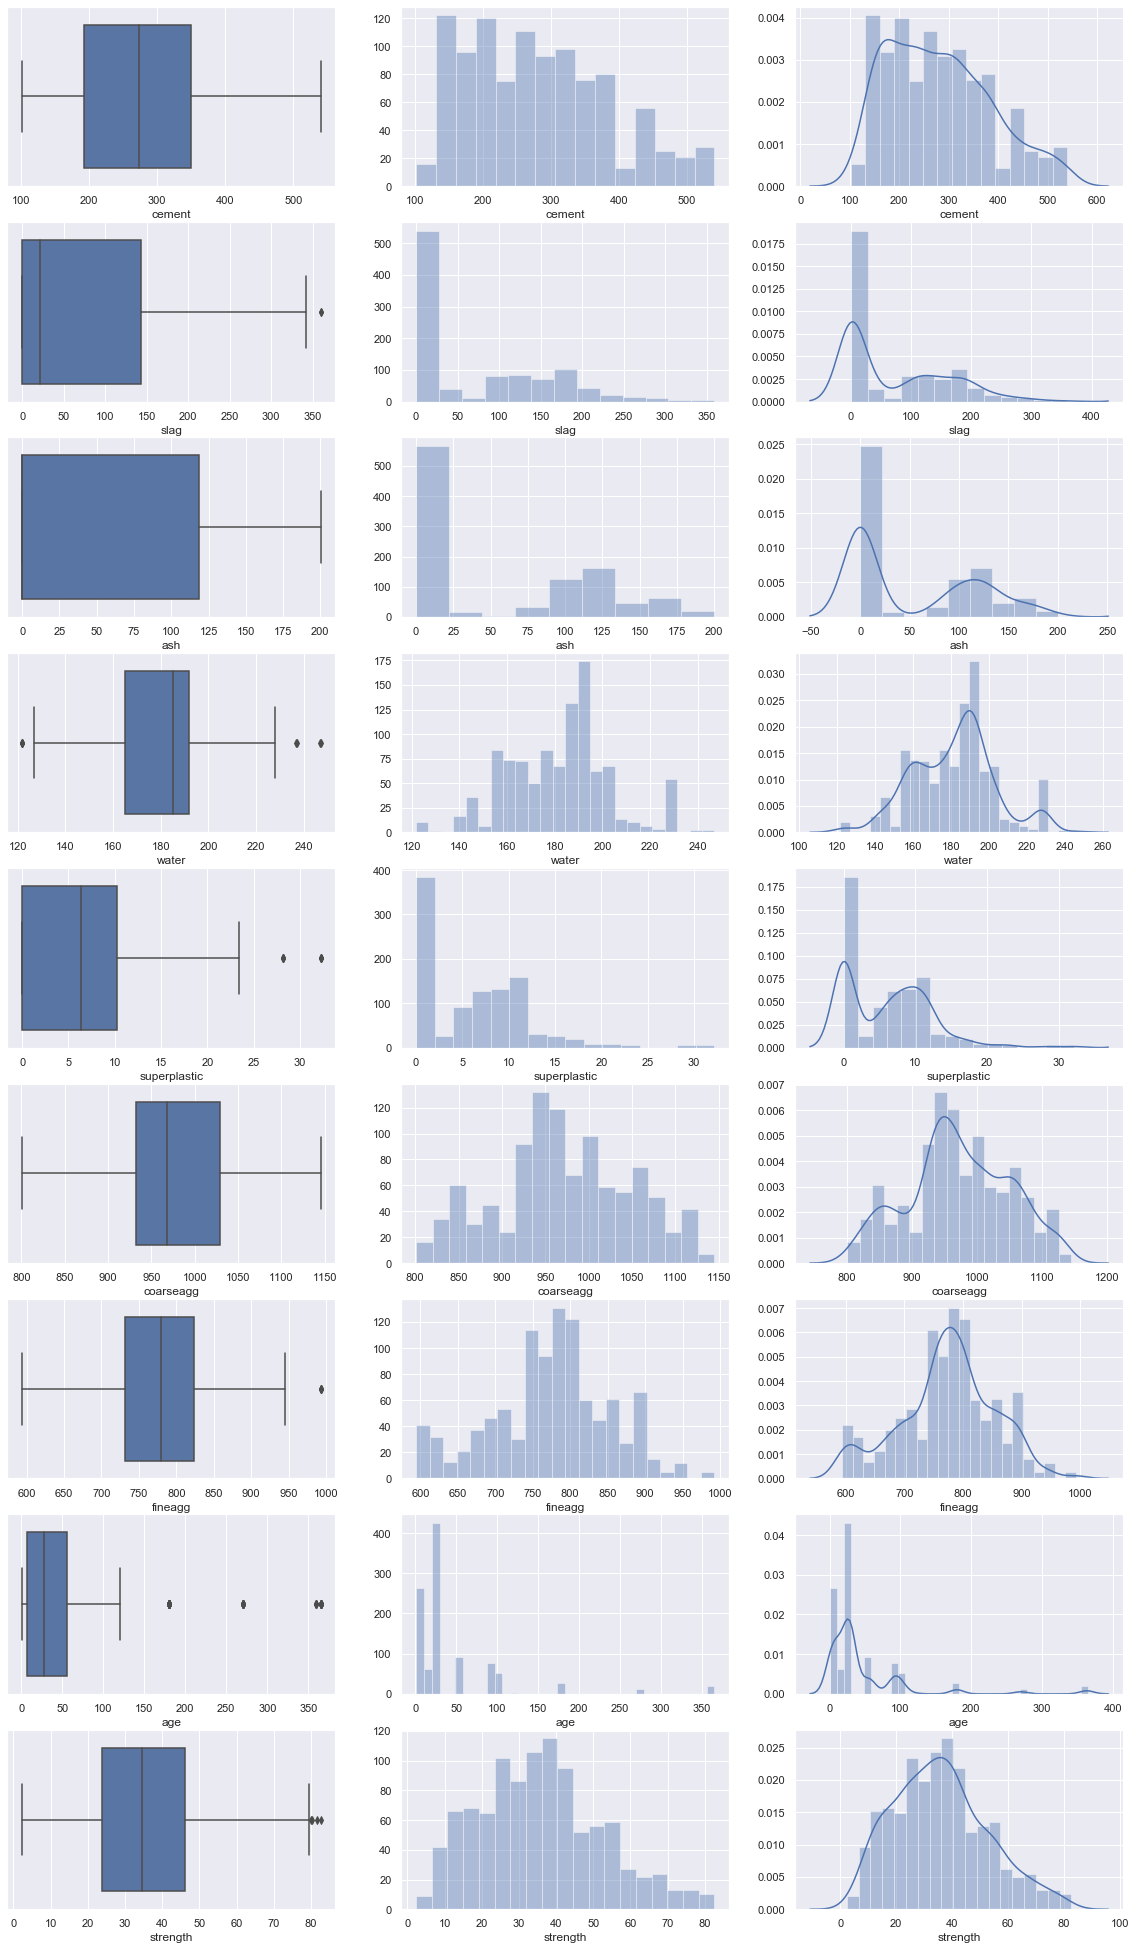

In [9]:
# Now let's plot all continous variables
def univariant_plot(number_of_attrs):
    fig, axs = plt.subplots(number_of_attrs, 3, figsize=(20,35))

    # Number of columns from the dataset is 9, computing the dataframe index directly using row and col
    for row in range(number_of_attrs):
        sns.boxplot(df.iloc[:, row], ax=axs[row, 0])
        sns.distplot(df.iloc[:, row], ax=axs[row, 1], axlabel=df.columns[row], kde=False)
        sns.distplot(df.iloc[:, row], ax=axs[row, 2], axlabel=df.columns[row])
    plt.show()

univariant_plot(9)

**Inferences:**<br>

* From the above individual continuous attributes distribution, looks like there are multiple gaussians present in some of the attributes.

***For example:***
1. slag, superplasting, courseagg and age has intersecting gaussians. And also there is 37% of data from superplastic, and 46% of data from slag are '0's.
2. ash: we can visualize 2 gausians, they both can be at 50 value. And also 55% of the records contain '0' values.


* Strength and cement are slightly normally distributed, however not perfectly.
* outliers present for age, superplastic, slag, lineagg, water, strength

**Observations on Outliers:**

* Assuming huge number of outliers present for age and superplastic attributes.
* ash has minimal level of outliers, where as slag has very minimum outliers.

**Let's expedite % of outliers of individual attributes**

### <font color=blue>Checking % of '0's</font>

In [10]:
# Number of records in 'ash' with '0' values
for col in df.columns.tolist():
    num_ash_with_0 = df[df[col] == 0].shape[0]
    _percentage_of_0s = num_ash_with_0 / df.shape[0]
    print (col + ' has ' + str(_percentage_of_0s) + ' % of 0s')

cement has 0.0 % of 0s
slag has 0.45728155339805826 % of 0s
ash has 0.5495145631067961 % of 0s
water has 0.0 % of 0s
superplastic has 0.3679611650485437 % of 0s
coarseagg has 0.0 % of 0s
fineagg has 0.0 % of 0s
age has 0.0 % of 0s
strength has 0.0 % of 0s


**Final Inferences on univarient analysis:**

1. cement is almost normal, and with littel right-skewness
2. Assuming slag has 2 and rightly skewed.
3. ash has two gaussians, looks like independent to each other and rightly skewed.
3. water has 3 guassians and slighly left skewed.
4. superplastic has 2 gaussians which are intersecting and rightly skewed.
5. coarseagg has 3 guassians and almost normal.
6. fineagg almost looks normal.
7. age has multiple guassians and rightly skewed.
8. stregth is almost normal.

Number of records with '0' present for slag(46%), ash(55%), superplastic(37%). Hence these records for these attributes can be missing values.

### <font color=blue>1.2 Bivarient & Multivarient Analysis</font>

**Note:** Bivarient plots w.r.to target (strength) attribute

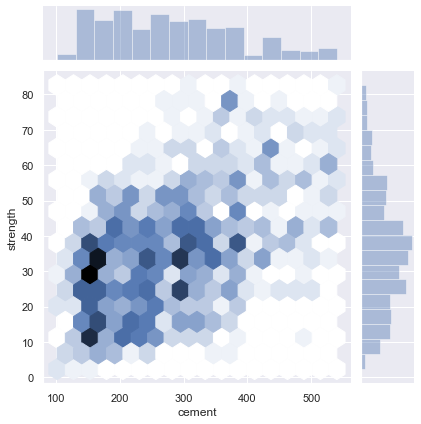

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  # Remove the CWD from sys.path while we load stuff.


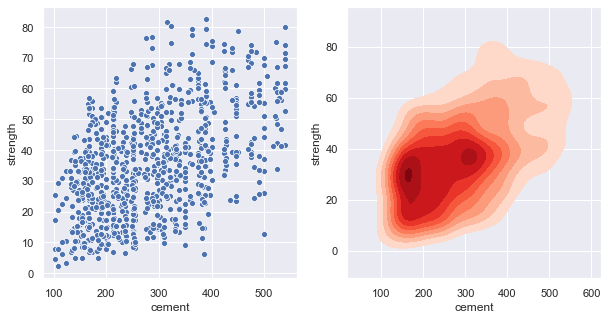

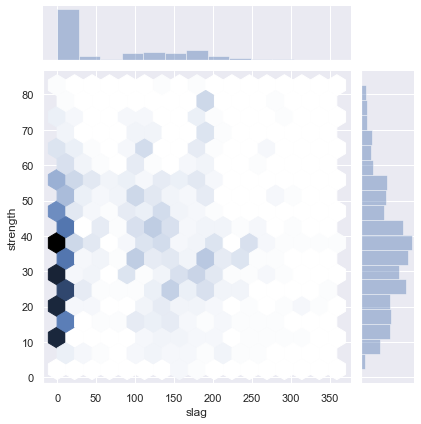

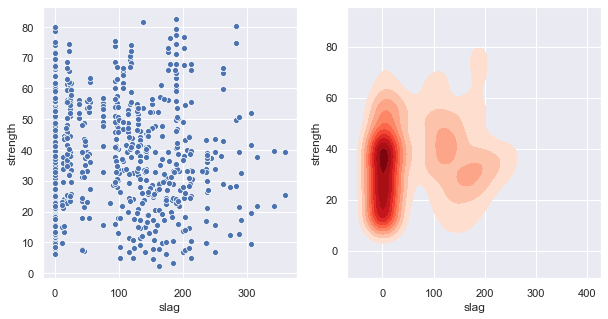

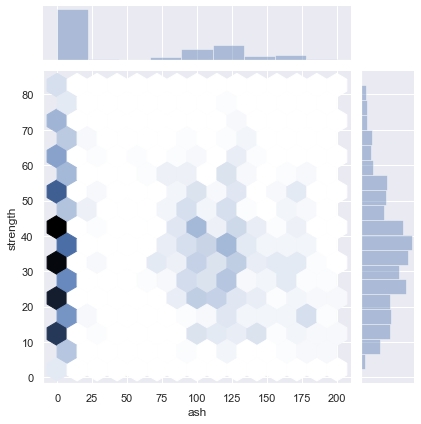

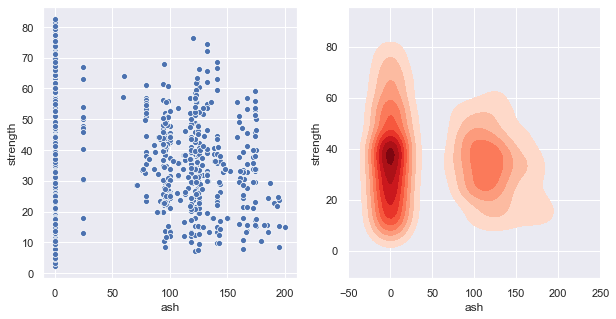

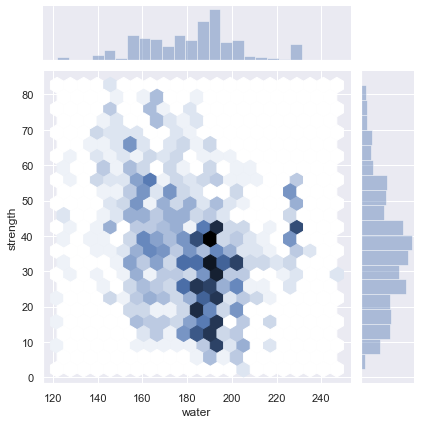

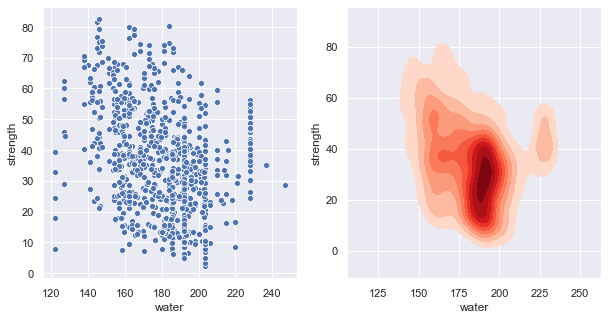

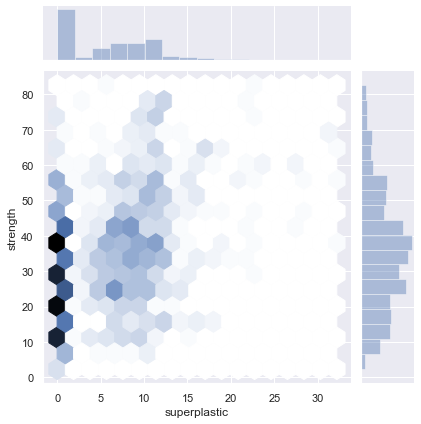

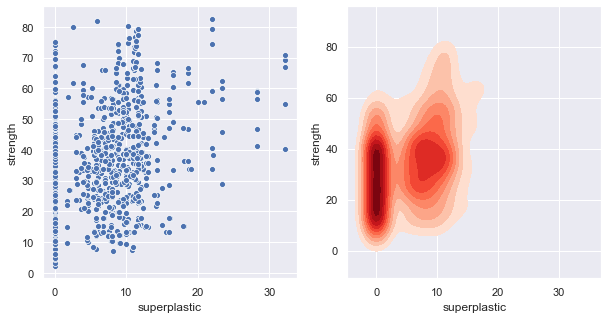

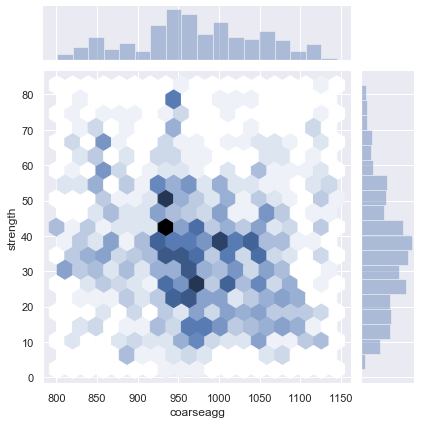

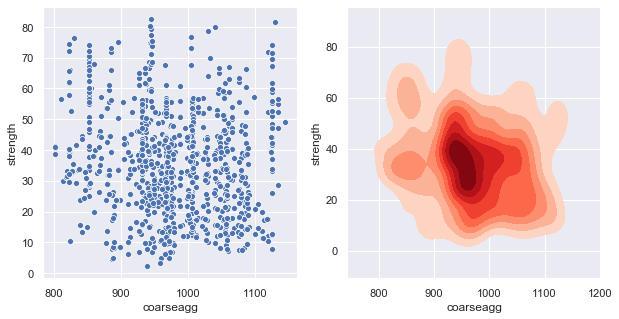

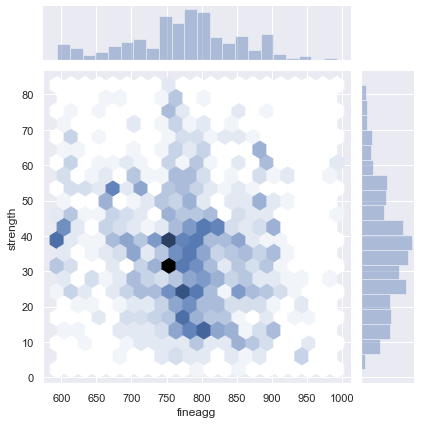

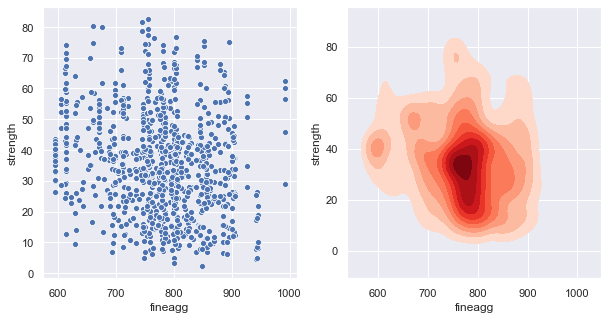

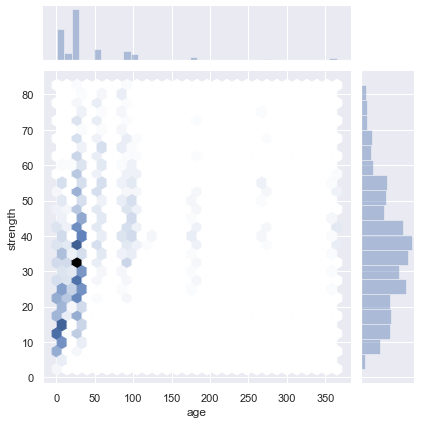

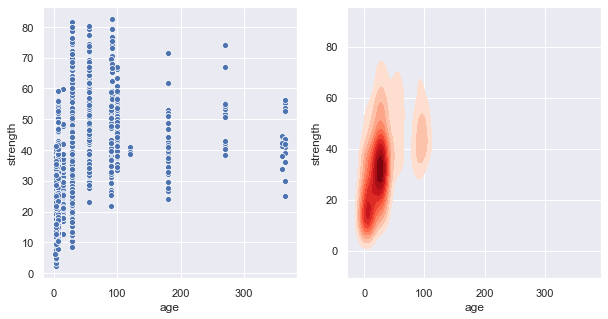

In [11]:
# Scatterplot w.r.to target variable
number_of_attrs = 8
def bivariant_plot():

    for row in range(number_of_attrs):
        sns.jointplot(df.iloc[:, row], df.iloc[:, 8], kind='hex')
        plt.show()
        fig, axs = plt.subplots(1, 2, figsize=(10,5))
        sns.scatterplot(x=df.columns.get_values()[row], y="strength", data=df, ax=axs[0])
        sns.kdeplot(df[df.columns.get_values()[row]], df.strength, cmap="Reds", shade=True, shade_lowest=False, ax=axs[1])
        plt.show()

bivariant_plot()

**Observations:**

1. Cement Vs strength: There is very little correlation exists. Most of the values located around cement values 100-400 range (same can be visualized by the kdeplot).
2. slag Vs strength, ash Vs strength: There is no correlation between slag/ash and target attribute. Most of the records values are '0's.
3. Same with water, superplastic, coarseagg, fineagg and age. And also most of the independent attributes values are point to '0'.

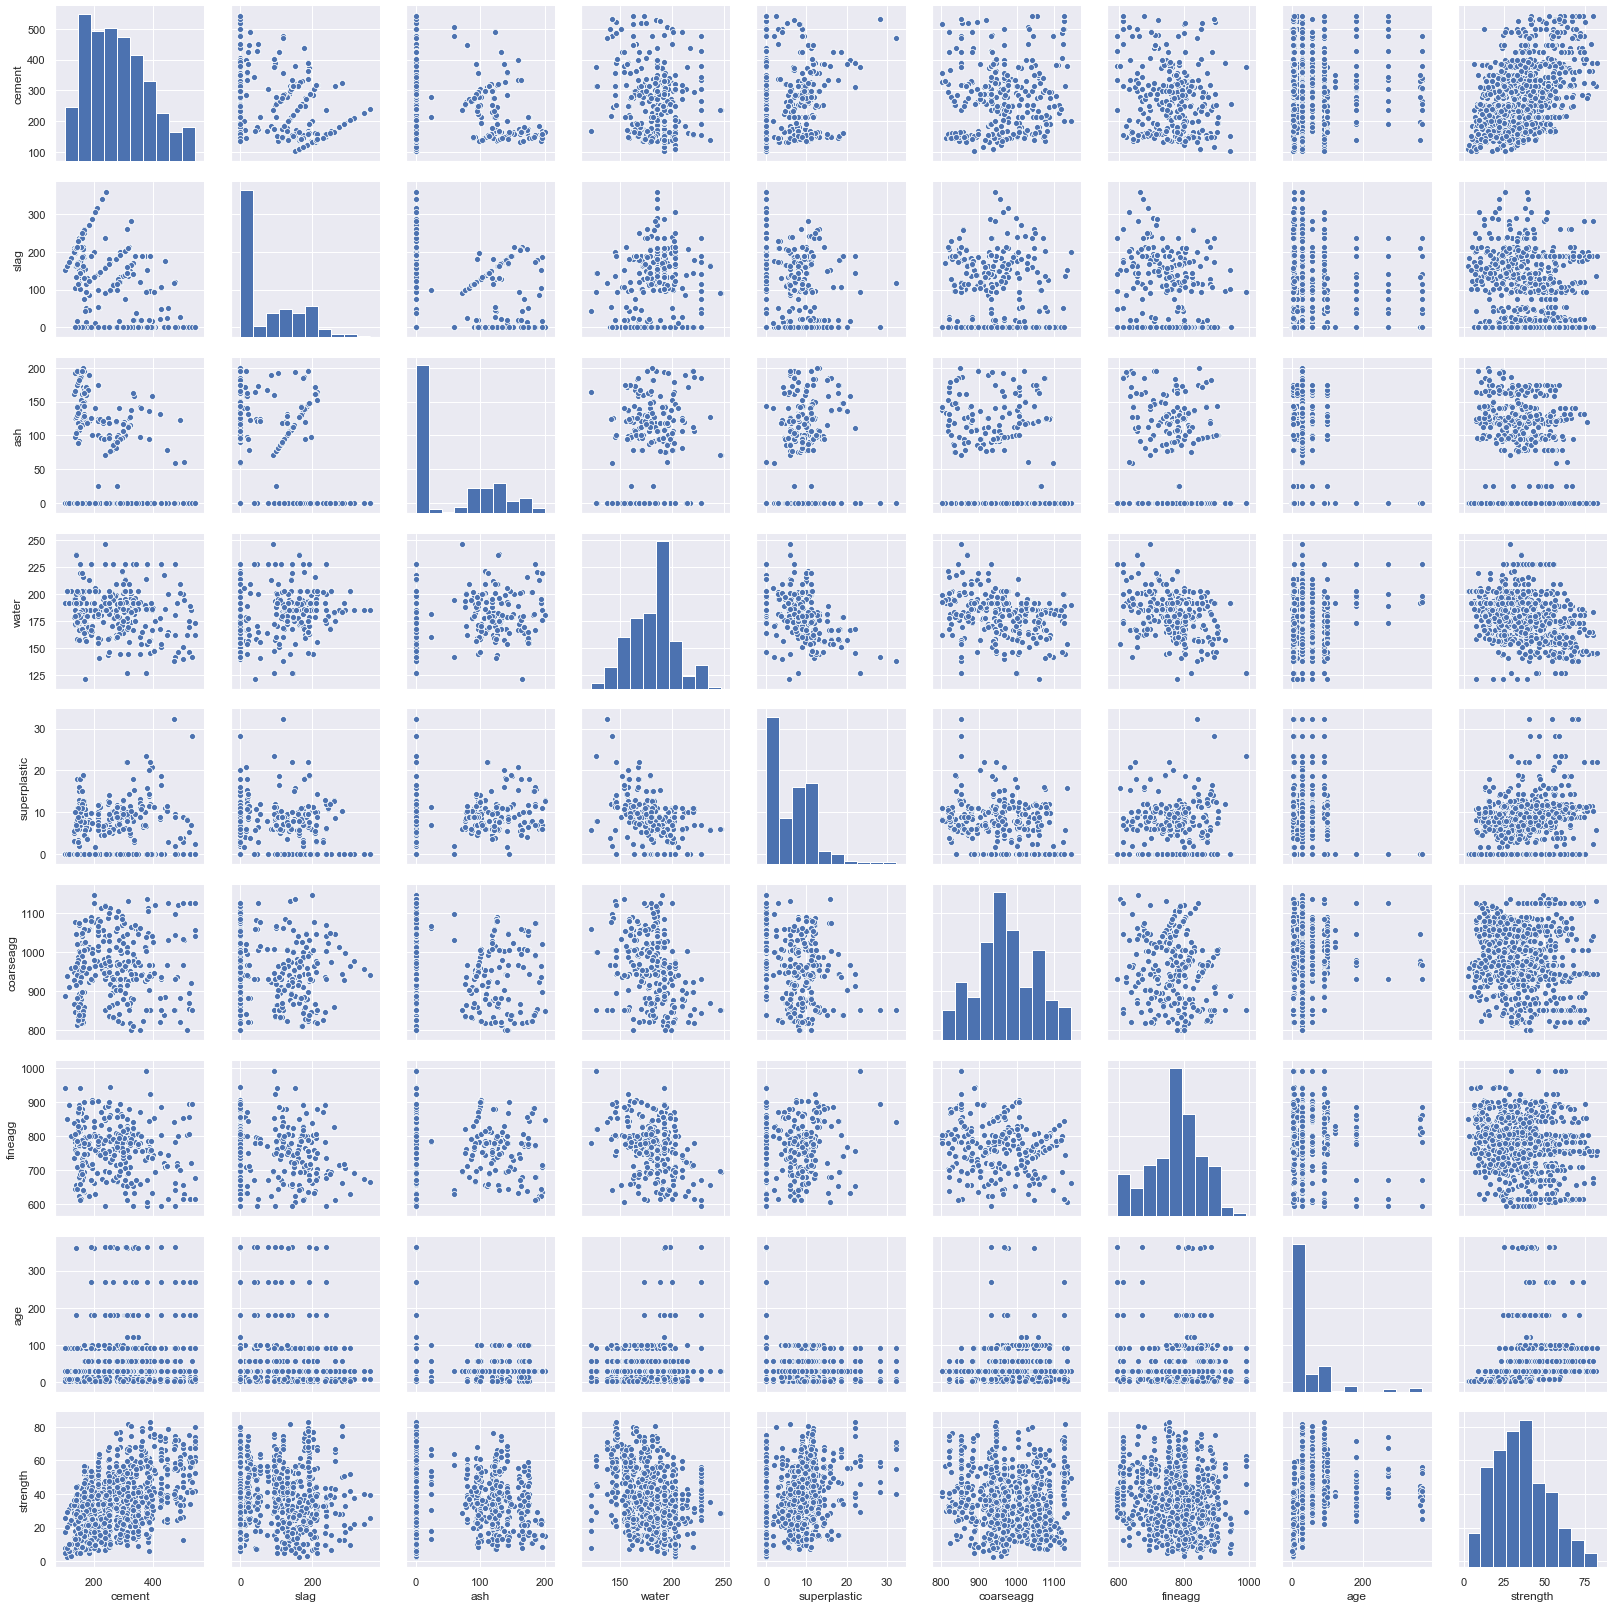

In [12]:
# Pairplot, plotting individual attribute w.r.to target 
sns.pairplot(df)

**Observations:**
Not much observation from the above pairplot - in general
* Frankly no correlation between attributes
* Presence of more than 1 guassians in each attribute distribution and also with outliers.
* Many records of slag, ash superplastic, age attributes values are '0's. Assumption those values might got missed.

***Analysis of each attribute:***
* ash looks like the data is spread into two clusters. 1 cluster with '0' values. If we consider '0' ash values are missing values, then ash dataset is with only one cluster.
* cement has slight +ve correlation with strength.
* water has very little -ve correlation with coarseagg and fineagg.
* From the graph, age distribution can be categorized into multiple groups and find which age group people are more participated into Concrete distribution

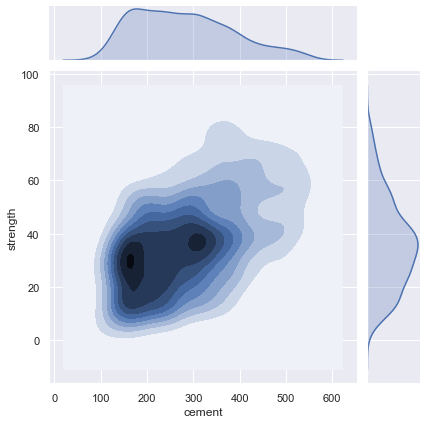

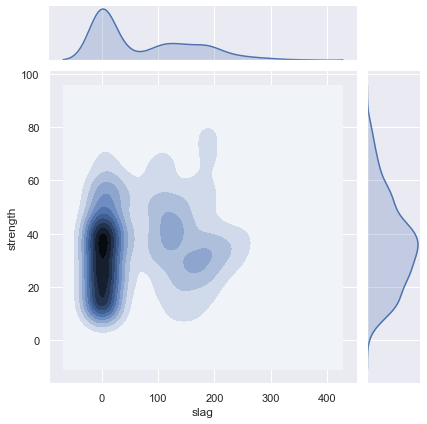

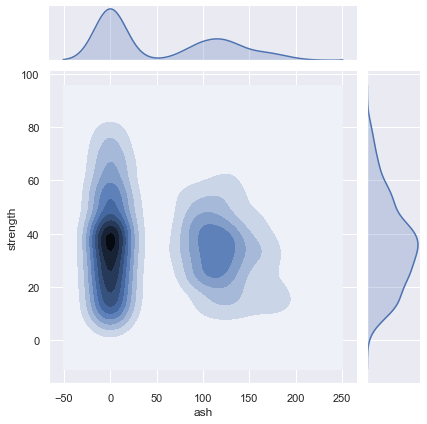

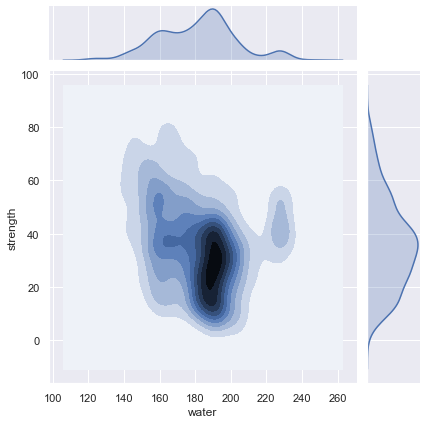

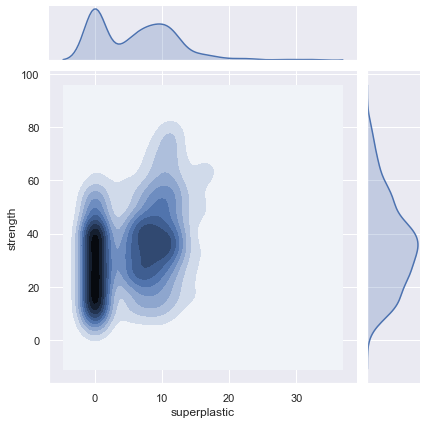

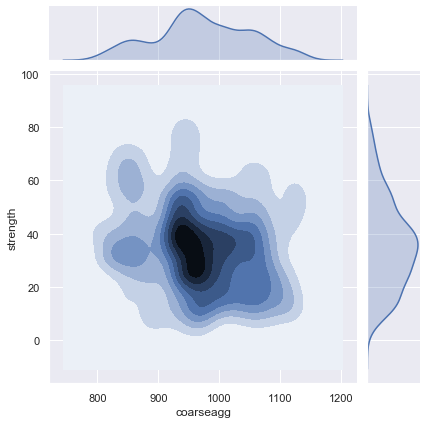

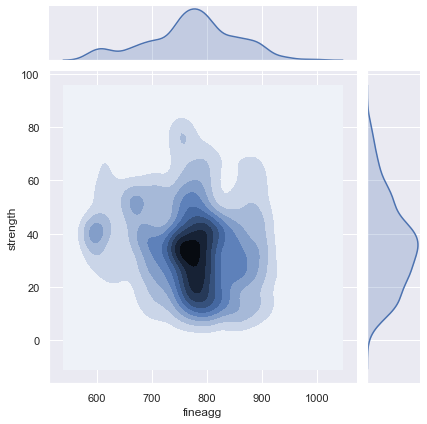

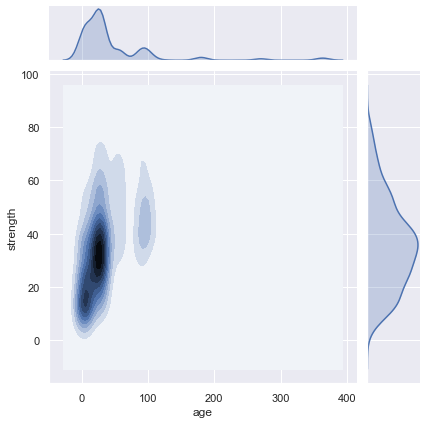

In [13]:
for row in range(8):
    sns.jointplot(df.iloc[:, row], df.iloc[:, 8], kind='kde')
    plt.show()

In [14]:
# corrlation matrix 
cor=df.corr()
cor

cement      slag       ash     water  superplastic  coarseagg  \
cement        1.000000 -0.275216 -0.397467 -0.081587      0.092386  -0.109349   
slag         -0.275216  1.000000 -0.323580  0.107252      0.043270  -0.283999   
ash          -0.397467 -0.323580  1.000000 -0.256984      0.377503  -0.009961   
water        -0.081587  0.107252 -0.256984  1.000000     -0.657533  -0.182294   
superplastic  0.092386  0.043270  0.377503 -0.657533      1.000000  -0.265999   
coarseagg    -0.109349 -0.283999 -0.009961 -0.182294     -0.265999   1.000000   
fineagg      -0.222718 -0.281603  0.079108 -0.450661      0.222691  -0.178481   
age           0.081946 -0.044246 -0.154371  0.277618     -0.192700  -0.003016   
strength      0.497832  0.134829 -0.105755 -0.289633      0.366079  -0.164935   

               fineagg       age  strength  
cement       -0.222718  0.081946  0.497832  
slag         -0.281603 -0.044246  0.134829  
ash           0.079108 -0.154371 -0.105755  
water        -0.450661  0.277618 -0.289633  
superplastic  0.222691 -0.192700  0.366079  
coarseagg    -0.178481 -0.003016 -0.164935  
fineagg       1.000000 -0.156095 -0.167241  
age          -0.156095  1.000000  0.328873  
strength     -0.167241  0.328873  1.000000

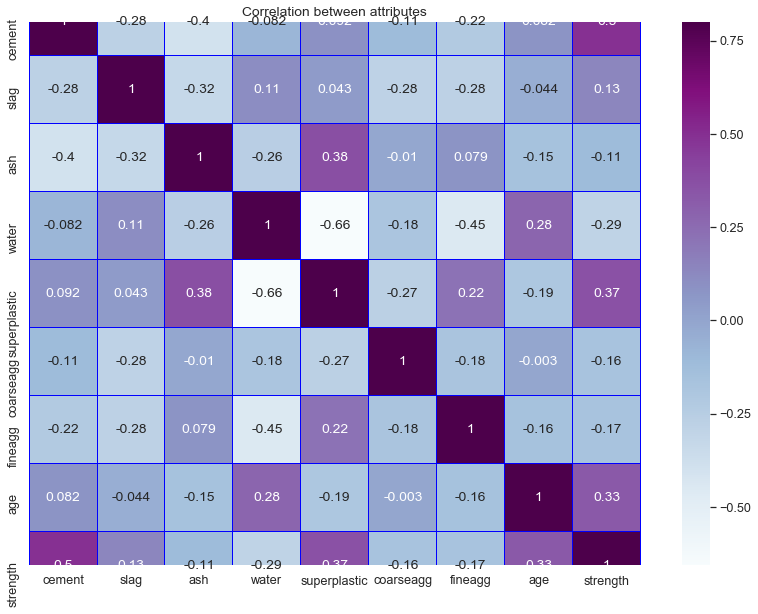

In [15]:
#heatmap
sns.set(font_scale=1.15)
plt.figure(figsize=(15, 10))

sns.heatmap(cor, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap="BuPu",linecolor="blue")
plt.title('Correlation between attributes');

**Observations:**

1. cement: this has negative correlation with slag, ash, and fineagg. And 49.7% positive correlation with target (strength).
2. slag: this has negative correlation with ash, coarseagg, fineagg. Little positive correlation (13%) with target (strength).
3. ash: negative correlation with water. positive correlation with superplastic. Little negative correlation (10%) with target (strength)
4. water: strong negative correlation with superplastic, fineagg. ~27% positive correlation  with age. Negative correlation with target (strength).
5. superplastic: negative correlation with coarseagg. And positive correlation almst 22% and 36% with fineagg and target (strength)
6. coarseagg: very light -ve correlation with fineagg and strength.
7. fineagg: very less negative correlation with age and strength.
8. age: 33% positive correlation with strength.

As none of the correlation is beyond 50% and between 20-30% with +ve/-ve correlation. we cannot drop any of the attributes at present with this analysis, and proceed with existing dataset.

## <font color=green>Observations from all types of analysis:</font>

**1. Give data analysis:**

> * There are 8 independent attributes ( cement, slag, ash, water, superplastic, coarseagg, fineagg, age) and one dependent variable (strength).
* All the records are numeric. 
* There are no missing values in any of the columns.
* All attributes are continuous type.
* All attributes are float type, except age (age is of integer type).
* None of the attribute has any negative values.
* There are 1030 records in the dataframe.
* No string present for any of the attribute values.

**2. Descriptive statistics analysis:**

> * cement, water, coarseagg, fineagg, strength: There is not much difference in mean and median (50%).
* Attributes: slag and ash, age, there is much difference in mean and 50% values, indicating mean > median, so being a right skewness in data.
* Minimum values of slag, ash and superplastic are '0', hoping these values cannot be accepted in estimating the concrete strength.
* Min value should be less than std, however 'cement' has 'min' and 'std' are almost same. And for 'water, coarseagg, fineagg' std is much lesser than 'min. Hence these attributes needs to be deep-dived.

**3. Univariant visualization:**

> * Looks like there are multiple gaussians present in some of the attributes.
* For example:
	§ slag, superplasting, courseagg and age has intersecting gaussians. And also there is 37% of data from superplastic, and 46% of data from slag are '0's.
	§ ash: we can visualize 2 gausians, they both can be at 50 value. And also 55% of the records contain '0' values.
* Strength and cement are almost normally distributed, however not a perfect normal distribution.
* outliers present for age, superplastic, slag, lineagg, water, strength

**4. Outliers:**
	
> * Huge number of outliers present for age and superplastic attributes.
* ash has minimal level of outliers, where as slag has very minimum outliers.

## <font color=green>Inferences from Visualizations:</font>
**1. Each Attribute distribution:**
    
> * cement is almost normal, and with littel right-skewness
* Assuming slag has 2 and rightly skewed.
* ash has 2 gaussians (i.e. 2 clusters), looks like independent to each other and rightly skewed. 1 cluster with '0' values. If we consider '0' ash values are missing values, then ash dataset is with only one cluster.
* water has 3 guassians and slighly left skewed.
* superplastic has 2 gaussians which are intersecting and rightly skewed.
* coarseagg has 3 guassians and almost normal.
* fineagg almost looks normal.
* age has multiple guassians and rightly skewed.
* stregth is almost normal.
* Number of records with '0' present for slag(46%), ash(55%), superplastic(37%). Hence these records for these attributes can be missing values.
		
**2. Correlation:**
		
> * cement: this has negative correlation with slag, ash, and fineagg. And 49.7% positive correlation with target (strength). Most of the values located around cement values 100-400 range
* slag: this has negative correlation with ash, coarseagg, fineagg. Little positive correlation (13%) with target (strength).
* ash: negative correlation with water. positive correlation with superplastic. Little negative correlation (10%) with target (strength)
* water: strong negative correlation with superplastic, fineagg. ~27% positive correlation with age. Negative correlation with target (strength).
* superplastic: negative correlation with coarseagg. And positive correlation almst 22% and 36% with fineagg and target (strength)
* coarseagg: very light -ve correlation with fineagg and strength.
* fineagg: very less negative correlation with age and strength.
* age: 33% positive correlation with strength.

## <font color=green>Technical Summary:</font>
* Many data has outliers, with right/left skewed and missing values (values which are '0').
* Frankly no strong correlation between attributes
* Clustered data present for all attributes. 
* cement, superplastic, age has positive correlation with strength. water has negative correlation with strength. Where as other attributes with very less correlation with target attribute.
* cement is the strong predictor amongst all for strength.
* As all attributes are some or the other way correlated, we cannot drop any of the attributes at present with this analysis, and proceed with existing dataset.

### <font color=blue>Regression visualization among dependent attributes</font>

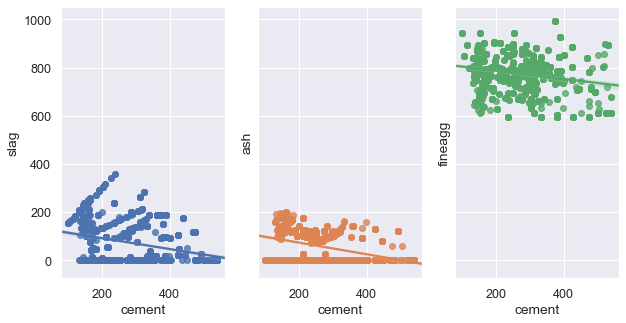

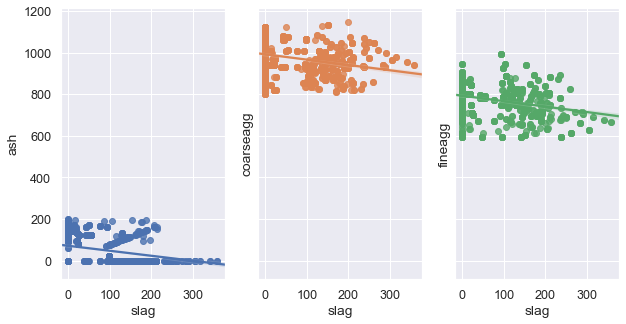

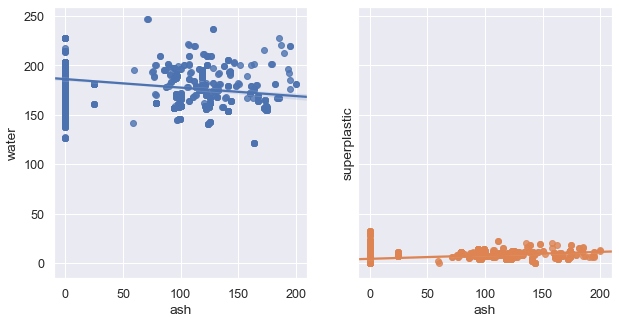

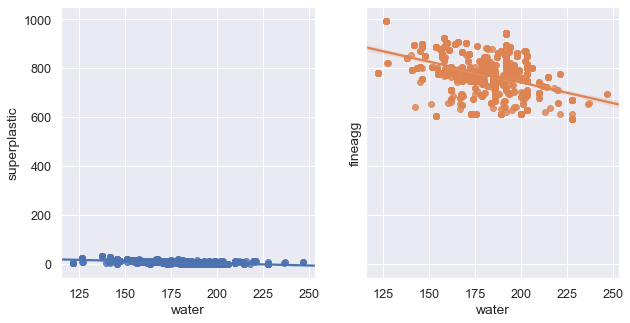

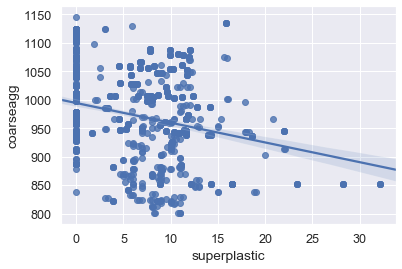

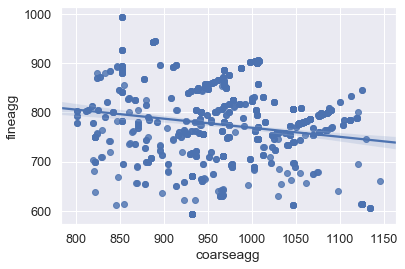

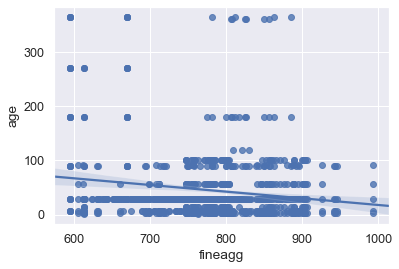

In [16]:
# Let us draw lmplot to better analyze relationship among independent variables
# lmplot of 
#        cement Vs {slag, ash, fineagg}
#        slag Vs {ash, coarseagg, fineagg}
#        ash Vs {water, superplastic}
#        water Vs {superplastic, fineagg}
#        superplastic Vs coarseagg
#        coarseagg Vs fineagg
#        fineagg Vs age

indep_attr_dict = {
    'cement': ['slag', 'ash', 'fineagg'],
     'slag' : ['ash', 'coarseagg', 'fineagg'],
     'ash' : ['water', 'superplastic'],
     'water' : ['superplastic', 'fineagg'],
     'superplastic' : ['coarseagg'],
     'coarseagg' : ['fineagg'],
     'fineagg' : ['age']
}

df = concrete_df.copy()
for key in indep_attr_dict:    
    value = indep_attr_dict[key]
    graph_len = len(value)
    if (graph_len > 1):
        fig, axs = plt.subplots(1, graph_len, figsize=(10,5), sharey=True)
        for indx in range(graph_len):
            sns.regplot(x=df[key], y=df[value[indx]], ax=axs[indx])
    else:
        sns.regplot(x=df[key], y=df[value[0]])
    plt.show()


**Observations:**
* Regression lines are horizontal for --> water Vs ash, superplastic Vs water. i.e. whatever value ash changes there is no change in superplastic and whatever water value changes, there is no change in superplastic.

### <font color=blue>All attributes Outliers boxplot

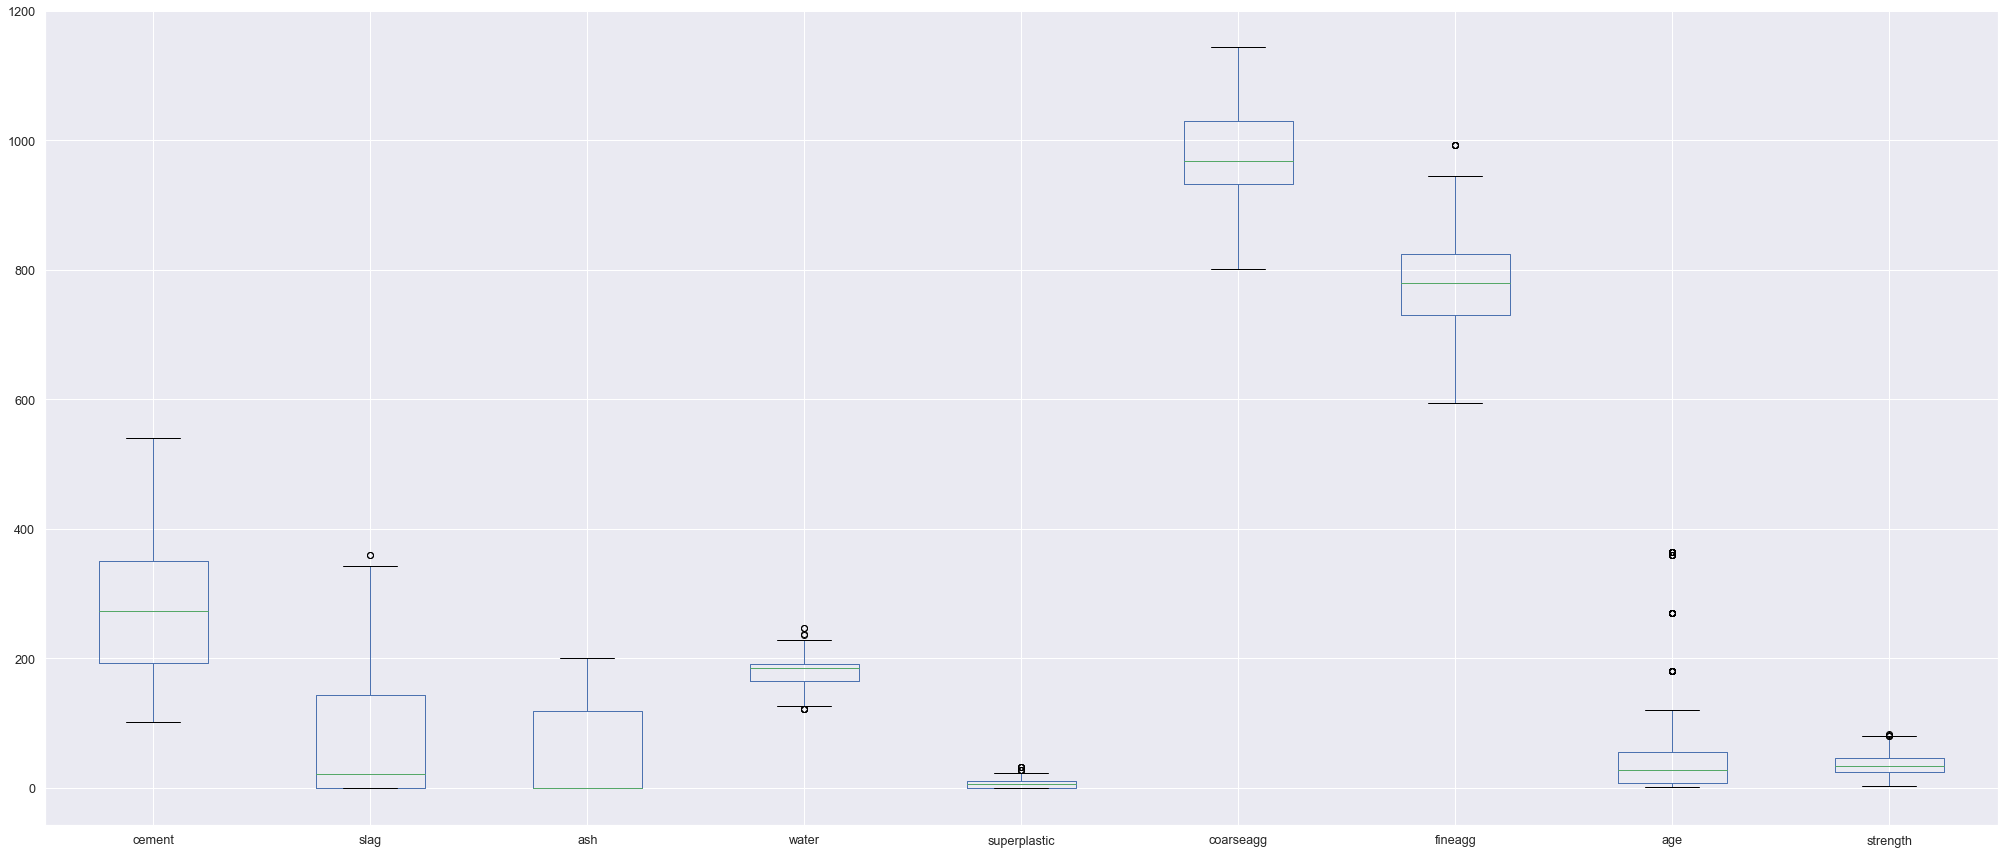

In [17]:
df.boxplot(figsize=(35,15))

**Observations:**
* Outliers present for slag, water, superplastic, fineagg, age and strength
* Huge number of outliers for water and age attributes

In [18]:
# age is integer type, which can be grouped.
tmp_df = concrete_df.copy()
print (tmp_df['age'].value_counts())
print (tmp_df['fineagg'].value_counts())

28     425
3      134
7      126
56      91
14      62
90      54
100     52
180     26
91      22
365     14
270     13
360      6
120      3
1        2
Name: age, dtype: int64
594.0    30
755.8    30
670.0    23
613.0    22
801.0    16
         ..
792.5     1
762.9     1
674.8     1
658.0     1
762.2     1
Name: fineagg, Length: 302, dtype: int64


In [19]:
#Checking for missing values
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

### <font color=blue>Handling Outliers</font>

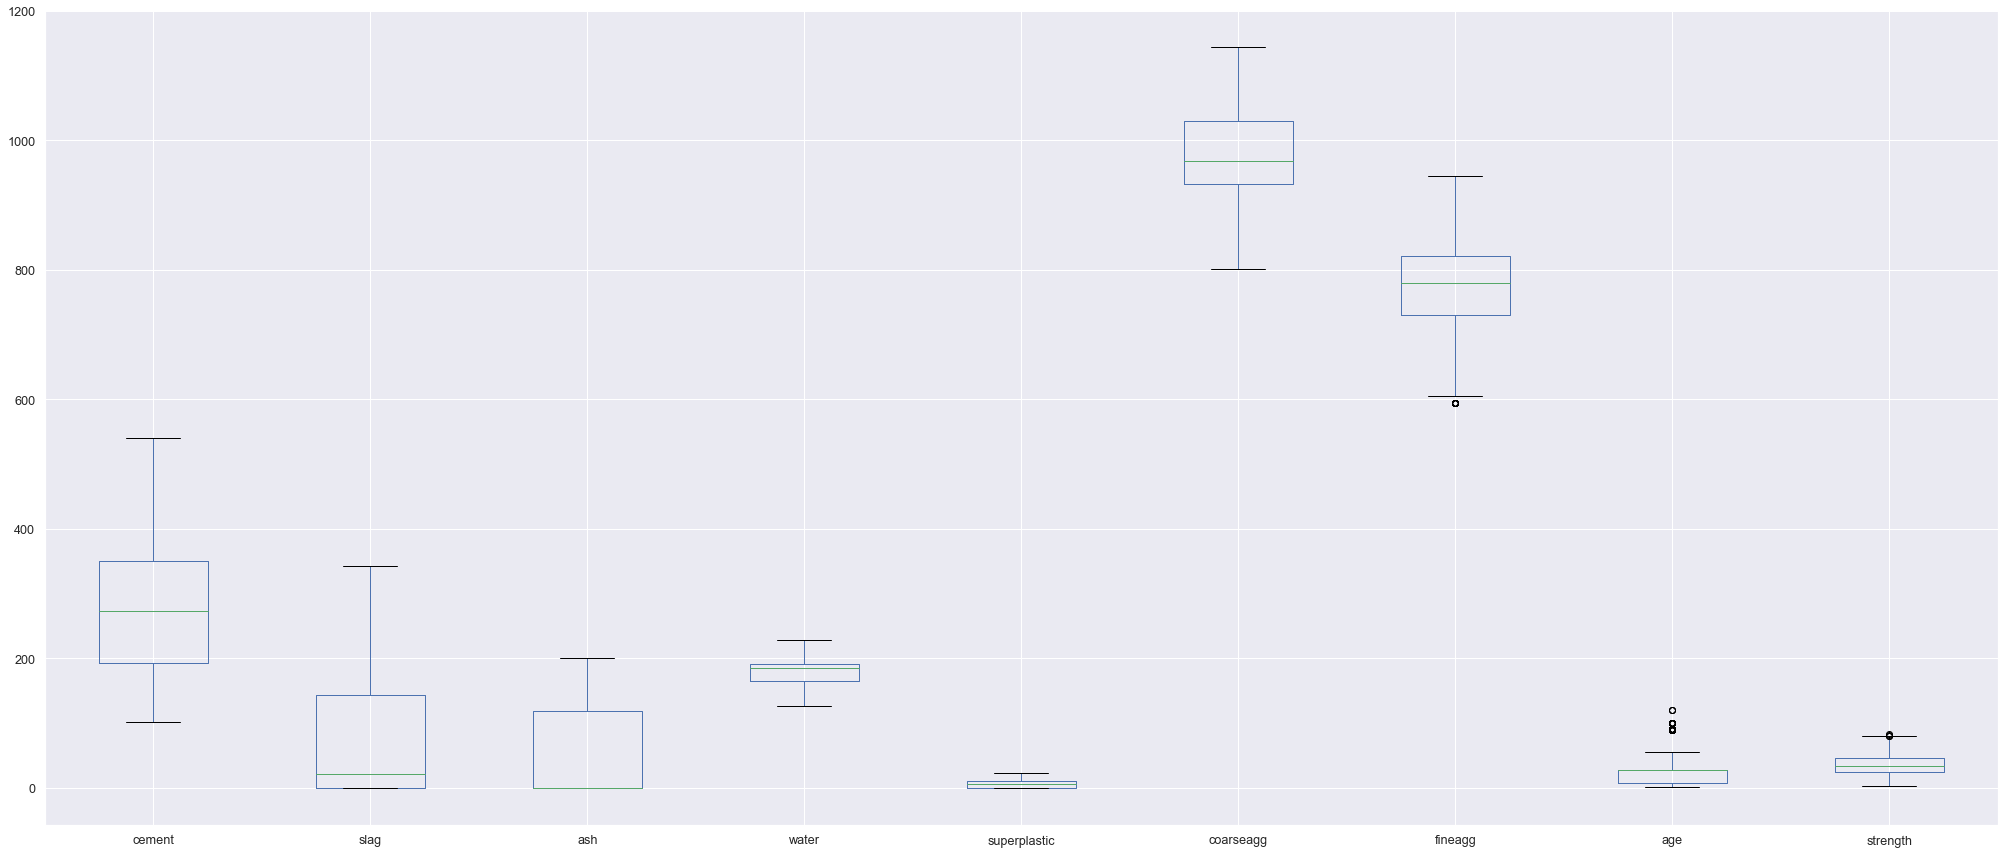

In [20]:
#Replacing the outliers by median
filled_outliers_df = concrete_df.copy()
for col in filled_outliers_df.columns[:-1]:
    q1 = filled_outliers_df[col].quantile(0.25)
    q3 = filled_outliers_df[col].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    filled_outliers_df.loc[(filled_outliers_df[col] < low) | (filled_outliers_df[col] > high), col] = filled_outliers_df[col].median()

filled_outliers_df.boxplot(figsize=(35,15))

**Observations:**<br>
* Outliers got reduced after filling outlier values with median.
* Most of the outliers were replaced. very less number of ourliers present for fineagg and strength, which can be ignored.
* age still shows good number of upper ourliers, because of below records <br>
        
***age*** ***number of records***<br>
365     14 <br>
270     13 <br>
360      6 <br>

In [21]:
filled_outliers_df['age'].value_counts()

28.0     484
3.0      134
7.0      126
56.0      91
14.0      62
90.0      54
100.0     52
91.0      22
120.0      3
1.0        2
Name: age, dtype: int64

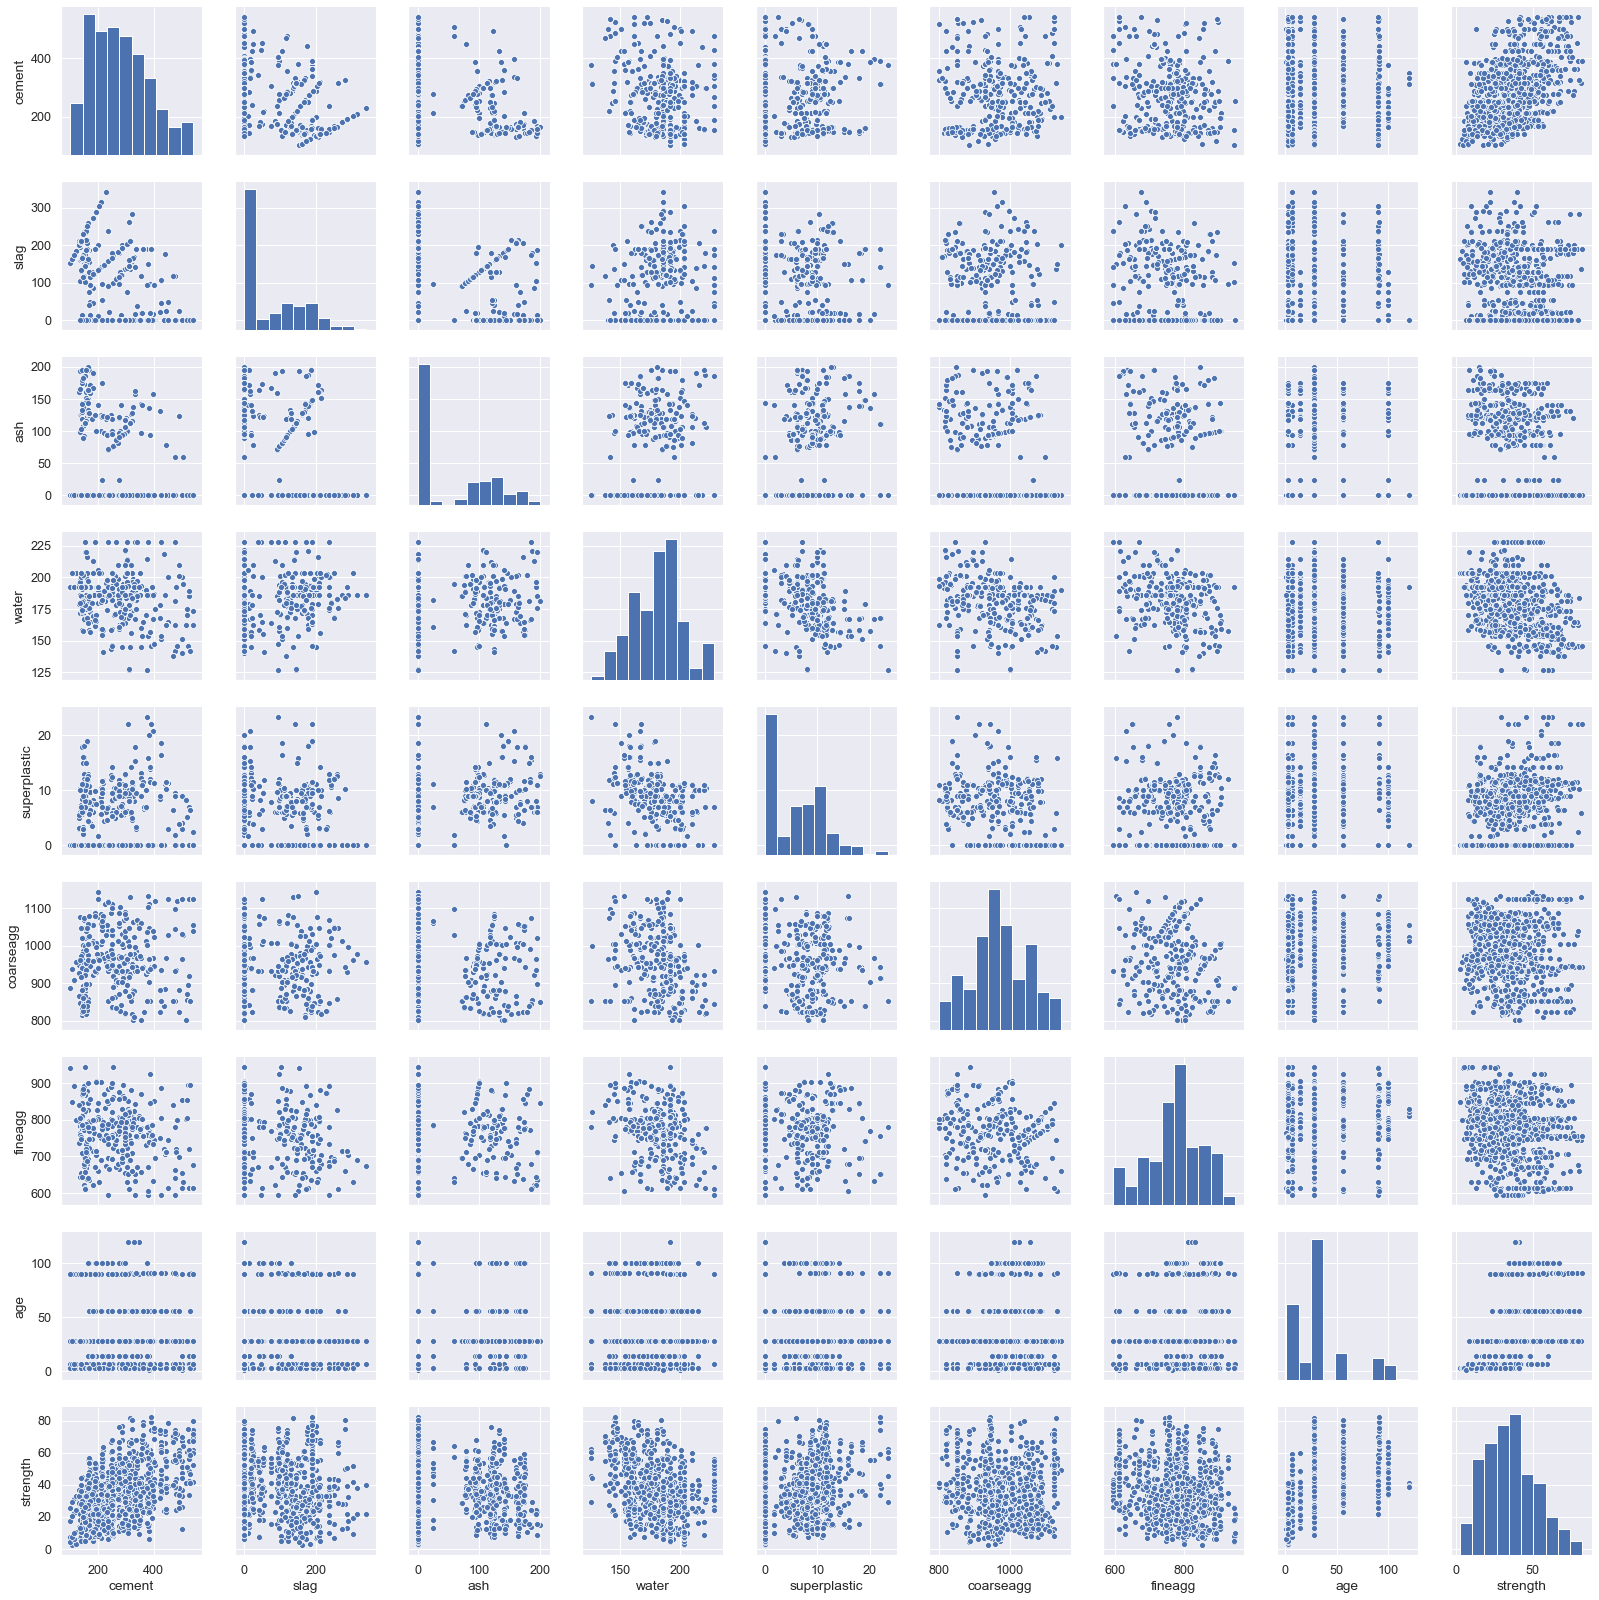

In [22]:
sns.pairplot(filled_outliers_df)

### <font color=green>Outliers got reduced when compared from the original RAW data, hence proceeding with this filled data 'filled_outliers_df' dataset </font> <br>

However still clusters did not get reduced. Neither strong correlation among independent attributes, nor between independent attribute Vs target (strength).

# <font color=blue>3. Feature Engineering, Model Building and Tuning</font>

### <font color=blue>3.1 Scale the attributes</font>

In [23]:
# Divide the data into X and y datasets (Independent attributes --> X, Dependent attribute --> y)
df = concrete_df.copy()
X = df.drop('strength', axis=1)
y = df[['strength']]

In [24]:
# Scale all columns of concrete_df
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

y_scaled = preprocessing.scale(y)
y_scaled = pd.DataFrame(y_scaled, columns=y.columns)

print ('X_scaled: ')
print (X_scaled)
print ('y_scaled: ')
print (y_scaled)

X_scaled: 
        cement      slag       ash     water  superplastic  coarseagg  \
0    -1.339017  1.601441 -0.847144  1.027590     -1.039143  -0.014398   
1    -1.074790 -0.367541  1.096078 -1.090116      0.769617   1.388141   
2    -0.298384 -0.856888  0.648965  0.273274     -0.118015  -0.206121   
3    -0.145209  0.465044 -0.847144  2.175461     -1.039143  -0.526517   
4    -1.209776  1.269798 -0.847144  0.549700      0.484905   0.958372   
...        ...       ...       ...       ...           ...        ...   
1025 -1.399330 -0.856888  1.747988 -0.073430      0.635635  -0.153365   
1026  2.394626 -0.856888 -0.847144 -1.863173      3.683731  -1.554617   
1027 -0.045645  0.488235  0.564545 -0.092171      0.451410  -1.323005   
1028  0.582373 -0.416244 -0.847144  2.175461     -1.039143  -0.526517   
1029  2.477915 -0.856888 -0.847144 -0.401393     -1.039143   1.956877   

       fineagg       age  
0    -0.312970 -0.279733  
1     0.282260 -0.501465  
2     1.093371 -0.279733  
3   

In [25]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.30, random_state=1)

### <font color=blue>3.2 Creation of simple linear model</font>

The coefficient for cement is 0.7917080306678752
The coefficient for slag is 0.5620608749496462
The coefficient for ash is 0.34747677102632063
The coefficient for water is -0.13186138372514944
The coefficient for superplastic is 0.13449876840644523
The coefficient for coarseagg is 0.11183689241537578
The coefficient for fineagg is 0.17370080312287323
The coefficient for age is 0.4175909779025137
The intercept for our model is -0.013041400221605257
Performance on training data using Linear Regression: 0.6031487540630229
Performance on testing data using Linear Regression: 0.6339136715208276
Accuracy:  0.6339136715208276
MSE:  0.38214294489585093


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


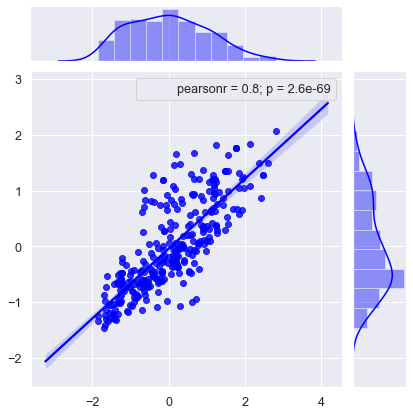

Method  accuracy
1  Linear Regression  0.633914

In [26]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

y_pred = regression_model.predict(X_test)
print('Performance on training data using Linear Regression:',regression_model.score(X_train, y_train))
print('Performance on testing data using Linear Regression:',regression_model.score(X_test, y_test))
acc = metrics.r2_score(y_test, y_pred)
print('Accuracy: ',acc)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
    
# Regression plot between y_test and y_pred (Test Vs Predicted) values
with sns.axes_style("darkgrid"):
    j = sns.jointplot(x=y_test, y=y_pred, kind='reg', color='blue')
    j.annotate(stat.pearsonr)
    plt.show()

#Store the accuracy results for each model in a dataframe for final comparison
results = pd.DataFrame({'Method':['Linear Regression'], 'accuracy': acc},index={'1'})
results = results[['Method', 'accuracy']]
results

### <font color=blue>3.3 Ridge Model</font>

Ridge model coefficient for cement is 0.7865213641430863
Ridge model coefficient for slag is 0.556966567823066
Ridge model coefficient for ash is 0.3429135805249537
Ridge model coefficient for water is -0.1353419616044599
Ridge model coefficient for superplastic is 0.1345049696357578
Ridge model coefficient for coarseagg is 0.1083150740636112
Ridge model coefficient for fineagg is 0.16918323855777448
Ridge model coefficient for age is 0.41713594031410994
Performance on training data using Ridge Regression: 0.603144790939098
Performance on testing data using Ridge Regression: 0.6340333563625518
Accuracy:  0.6340333563625518
MSE:  0.3820180106540674


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


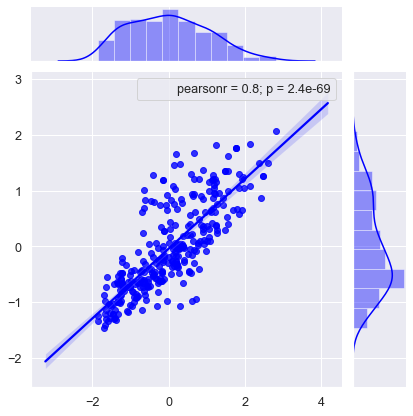

Method  accuracy
1  Linear Regression  0.633914
2   Ridge Regression  0.634033

In [27]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)

for idx, col_name in enumerate(X_train.columns):
    print("Ridge model coefficient for {} is {}".format(col_name, ridge.coef_[0][idx]))
    
y_pred = ridge.predict(X_test)
print('Performance on training data using Ridge Regression:',ridge.score(X_train, y_train))
print('Performance on testing data using Ridge Regression:',ridge.score(X_test, y_test))
acc = metrics.r2_score(y_test, y_pred)
print('Accuracy: ',acc)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
    
# Regression plot between y_test and y_pred (Test Vs Predicted) values
with sns.axes_style("darkgrid"):
    j = sns.jointplot(x=y_test, y=y_pred, kind='reg', color='blue')
    j.annotate(stat.pearsonr)
    plt.show()

#Store the accuracy results for each model in a dataframe for final comparison
results = pd.concat([results, pd.DataFrame({'Method':['Ridge Regression'], 'accuracy': [acc]},index={'2'})])
results = results[['Method', 'accuracy']]
results

**Observation:**
* cement, slag, ash, age attributes has high cofficient value than others. Hence assuming they are the strong predictors for the target (strength).
* In these 4 arrtibues cement is the strongest attribute.
* Assuming water, superplastic, coarseagg, fineagg are less significant attributes.
* There is not much difference in accuracy in Linear and Rigge regression models.

**Let's check the same using Lasso, where Lasso dops the least significant attributes.**

### <font color=blue>3.4 Lasso Model</font>

Lasso model coefficient for (0, 'cement') is 0.39456594309288484
Lasso model coefficient for (1, 'slag') is 0.1477748058762594
Lasso model coefficient for (2, 'ash') is 0.0
Lasso model coefficient for (3, 'water') is -0.11823667968852536
Lasso model coefficient for (4, 'superplastic') is 0.19361099150006758
Lasso model coefficient for (5, 'coarseagg') is -0.0
Lasso model coefficient for (6, 'fineagg') is -0.0
Lasso model coefficient for (7, 'age') is 0.25436079898451275
Performance on training data using Lasso Regression: 0.5215627623725142
Performance on testing data using Lasso Regression: 0.51856614888699
Accuracy:  0.51856614888699
MSE:  0.5025496319438302


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


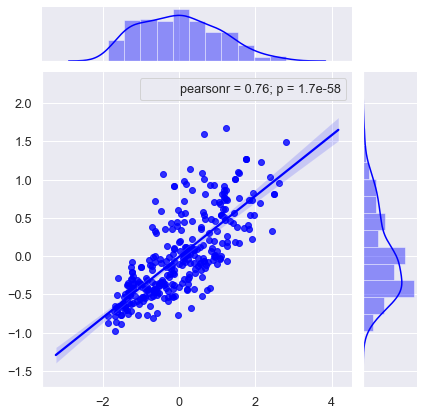

Method  accuracy
1  Linear Regression  0.633914
2   Ridge Regression  0.634033
3   Lasso Regression  0.518566

In [28]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)

idx = 0
for col_name in enumerate(X_train.columns):
    print("Lasso model coefficient for {} is {}".format(col_name, lasso.coef_[idx]))
    idx = idx+1
    
y_pred = lasso.predict(X_test)
print('Performance on training data using Lasso Regression:',lasso.score(X_train, y_train))
print('Performance on testing data using Lasso Regression:',lasso.score(X_test, y_test))
acc = metrics.r2_score(y_test, y_pred)
print('Accuracy: ',acc)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
   
y_pred = np.reshape(y_pred, (-1, 1))

# Regression plot between y_test and y_pred (Test Vs Predicted) values
with sns.axes_style("darkgrid"):
    j = sns.jointplot(x=y_test, y=y_pred, kind='reg', color='blue')
    j.annotate(stat.pearsonr)
    plt.show()

#Store the accuracy results for each model in a dataframe for final comparison
results = pd.concat([results, pd.DataFrame({'Method':['Lasso Regression'], 'accuracy': [acc]},index={'3'})])
results = results[['Method', 'accuracy']]
results

**Observations:**
* Lasso dropped ash, coarseagg and fineagg attributes, which are not same from Ridge regression.
* Lasso accuracy got dropped compared to Ridge and Linear Regressions.

### <font color=blue>3.5 Generating and checking with Polynomial model</font>

[ 5.02512283e-17  1.34777181e+01  1.01453909e+01  6.05814040e+00
 -1.56595255e+00  4.25130927e+00  1.23634849e+00  2.53761032e+00
  1.49772131e+01  7.59594704e-01  1.15681909e+00 -3.90120685e+00
 -1.73806869e+00  3.29193411e-01  6.17368282e-01  2.91053268e+00
  1.76307429e+00 -1.63204600e+00  5.21667573e-01  3.68167194e-01
  2.08128646e+00  4.26397239e+00 -2.31745785e+00 -2.32994460e+00
  2.58685837e-01  1.97858614e+00  6.75668908e+00  1.96653055e+00
 -1.09589014e+00 -3.09952083e-01 -9.61638886e-01  1.77590106e+00
  9.90577456e-01  2.40653442e+00  1.63052044e+00 -3.01539427e-01
  1.84973490e+00]
Performance on training data using Linear Regression with Polynomial: 0.7549578268848259
Performance on testing data using Linear Regression with Polynomial: 0.7444710081439017
Accuracy:  0.7444710081439015
MSE:  74.3690451029078


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


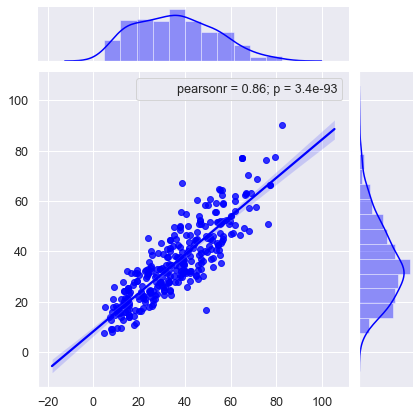

Method  accuracy
1                  Linear Regression  0.633914
2                   Ridge Regression  0.634033
3                   Lasso Regression  0.518566
4  Linear Regression with Polynomial  0.744471

In [29]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)
X_poly = poly.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)

regression_model.fit(X_train, y_train)
print(regression_model.coef_[0])

y_pred = regression_model.predict(X_test)
print('Performance on training data using Linear Regression with Polynomial:',regression_model.score(X_train, y_train))
print('Performance on testing data using Linear Regression with Polynomial:',regression_model.score(X_test, y_test))
acc = metrics.r2_score(y_test, y_pred)
print('Accuracy: ',acc)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

# Regression plot between y_test and y_pred (Test Vs Predicted) values
with sns.axes_style("darkgrid"):
    j = sns.jointplot(x=y_test, y=y_pred, kind='reg', color='blue')
    j.annotate(stat.pearsonr)
    plt.show()

#Store the accuracy results for each model in a dataframe for final comparison
results = pd.concat([results, pd.DataFrame({'Method':['Linear Regression with Polynomial'], 'accuracy': [acc]},index={'4'})])
results = results[['Method', 'accuracy']]
results

**Observation:**
* There is a lot of improvement in accuracy with Polynomial model.

Ridge model Coefficients: [[ 0.         13.3230364   9.98806788  5.92007287 -1.6769773   4.24346992
   1.14709561  2.40295661 14.94433259  0.75048865  1.15780428 -3.8556977
  -1.72087746  0.33506201  0.61718292  2.7638557   1.74523077 -1.60892884
   0.5291864   0.35781419  2.0722416   4.15030544 -2.26730837 -2.32755965
   0.26752031  1.98410524  6.6046349   1.97079137 -1.07823346 -0.3095362
  -1.03929564  1.77010082  0.98752549  2.43497624  1.63032432 -0.31792245
   1.73711233]]
Performance on training data using Ridge Regression with Polynomial: 0.7549463250929687
Performance on testing data using Ridge Regression with Polynomial: 0.7444379607063953
Accuracy:  0.7444379607063953
MSE:  74.37866321454587


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


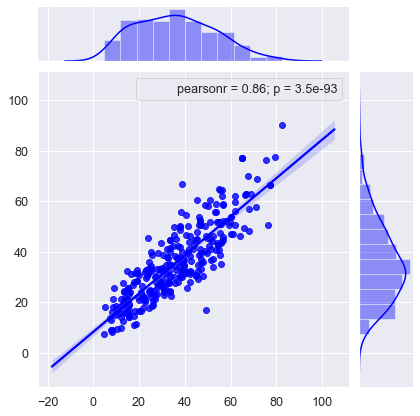

Method  accuracy
1                  Linear Regression  0.633914
2                   Ridge Regression  0.634033
3                   Lasso Regression  0.518566
4  Linear Regression with Polynomial  0.744471
5   Ridge Regression with Polynomial  0.744438

In [30]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model Coefficients:", (ridge.coef_))

y_pred = ridge.predict(X_test)
print('Performance on training data using Ridge Regression with Polynomial:',ridge.score(X_train, y_train))
print('Performance on testing data using Ridge Regression with Polynomial:',ridge.score(X_test, y_test))
acc = metrics.r2_score(y_test, y_pred)
print('Accuracy: ',acc)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
    
# Regression plot between y_test and y_pred (Test Vs Predicted) values
with sns.axes_style("darkgrid"):
    j = sns.jointplot(x=y_test, y=y_pred, kind='reg', color='blue')
    j.annotate(stat.pearsonr)
    plt.show()

#Store the accuracy results for each model in a dataframe for final comparison
results = pd.concat([results, pd.DataFrame({'Method':['Ridge Regression with Polynomial'], 'accuracy': [acc]},index={'5'})])
results = results[['Method', 'accuracy']]
results

Lasso model: [ 0.         12.95711163  9.59317708  5.56241425 -1.93810238  4.21165184
  0.92567816  2.09554658 14.88840343  0.69426378  1.08237414 -3.65259792
 -1.71422299  0.28595558  0.59790307  2.25336105  1.63038428 -1.47383575
  0.49781242  0.27234393  2.03103573  3.75939362 -2.07518639 -2.33537427
  0.22372387  1.95973654  6.14359589  1.89575026 -1.02176875 -0.27259848
 -1.27000962  1.73113555  0.8975625   2.55176152  1.59729449 -0.36995176
  1.34962187]
Performance on training data using Lasso Regression with Polynomial: 0.7547590604429038
Performance on testing data using Lasso Regression with Polynomial: 0.7441326585099639
Accuracy:  0.7441326585099639
MSE:  74.46751823115865


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


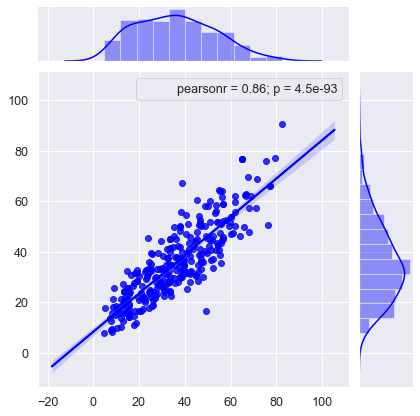

Method  accuracy
1                  Linear Regression  0.633914
2                   Ridge Regression  0.634033
3                   Lasso Regression  0.518566
4  Linear Regression with Polynomial  0.744471
5   Ridge Regression with Polynomial  0.744438
6   Lasso Regression with Polynomial  0.744133

In [31]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))
   
y_pred = lasso.predict(X_test)
print('Performance on training data using Lasso Regression with Polynomial:',lasso.score(X_train, y_train))
print('Performance on testing data using Lasso Regression with Polynomial:',lasso.score(X_test, y_test))
acc = metrics.r2_score(y_test, y_pred)
print('Accuracy: ',acc)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

y_pred = np.reshape(y_pred, (-1, 1))
# Regression plot between y_test and y_pred (Test Vs Predicted) values
with sns.axes_style("darkgrid"):
    j = sns.jointplot(x=y_test, y=y_pred, kind='reg', color='blue')
    j.annotate(stat.pearsonr)
    plt.show()

#Store the accuracy results for each model in a dataframe for final comparison
results = pd.concat([results, pd.DataFrame({'Method':['Lasso Regression with Polynomial'], 'accuracy': [acc]},index={'6'})])
results = results[['Method', 'accuracy']]
results

**Note:**
* From above table, at present any of 4, 5, 6 models are good in accuracy (models built with Polynomial). Hence let's draw confidence levels of these models.

**Note:**<br>
Except age, all other attributes units are different. Hence all attributes has to be placed in same units. Hence using Z score for scaling.
### <font color=blue>3.5 Model building with all attributes</font>

In [32]:
# Scaling the dataset using Z-score to keep all attributes units to same
filled_outliers_df_z = filled_outliers_df.apply(zscore)
filled_outliers_df_z=pd.DataFrame(filled_outliers_df_z,columns=concrete_df.columns)

Feature importances: 
                    Imp
cement        0.351391
slag          0.094079
ash           0.013138
water         0.128298
superplastic  0.019159
coarseagg     0.035737
fineagg       0.029628
age           0.328569
*****************************************************************
        cement      slag       ash     water  superplastic  coarseagg  \
339  -0.432412  0.981444 -0.847144  0.502442     -1.091166  -0.004104   
244   1.070619 -0.858192 -0.847144  0.502442     -1.091166  -0.423579   
882  -0.647814 -0.858192  1.876181 -1.313691      1.046014   1.021422   
567  -1.207861  1.286097 -0.847144  0.551002      0.552818   0.953226   
923   0.276023 -0.858192 -0.847144  0.502442     -1.091166  -0.037559   
...        ...       ...       ...       ...           ...        ...   
1018 -1.284448  0.489312  0.544222  0.988039      0.552818  -1.452965   
1015  0.161142 -0.858192  0.825622  0.211084      0.004824  -1.208486   
341  -0.955122 -0.858192  1.763621 -0.585295   

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


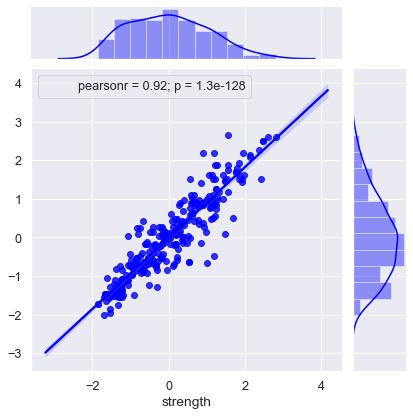

In [33]:
dtree_model = DecisionTreeRegressor()

def build_dtree_model(df_z, attr_tobe_considered):
    # Step: 1 - Separating independent and dependent attributes
    if (attr_tobe_considered == 'all'):
        X = df_z.iloc[:,0:8]
    else:
        X = df_z.iloc[:, [0, 1, 2, 3, 7]]
        
    y = filled_outliers_df_z.iloc[:,8]
    
    # Step: 2 - Split X and y into training and test set in 70:30 ratio
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)
    
    # Step: 3 - Buidling model
    dtree_model.fit(X_train , y_train)
    
    # printing the feature importance
    print('Feature importances: \n',pd.DataFrame(dtree_model.feature_importances_,columns=['Imp'],index=X_train.columns))
    
    print ('*****************************************************************')

    # Step: 4 - Performance computation  
    y_pred = dtree_model.predict(X_test)
    print(X_test)
    print('Performance on training data using DT:',dtree_model.score(X_train, y_train))
    print('Performance on testing data using DT:',dtree_model.score(X_test, y_test))
    acc_DT = metrics.r2_score(y_test, y_pred)
    print('Accuracy DT: ',acc_DT)
    print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
    
    # Step: 5 - Regression plot between y_test and y_pred (Test Vs Predicted) values
    with sns.axes_style("darkgrid"):
        j = sns.jointplot(x=y_test, y=y_pred, kind='reg', color='blue')
        j.annotate(stat.pearsonr)
        plt.show()
    
    return acc_DT

acc = build_dtree_model(filled_outliers_df_z, 'all')

There is a huge difference in performance on trailing and testing. Which indicates overfitting.

In [34]:
#Store the accuracy results for each model in a dataframe for final comparison
results = pd.concat([results, pd.DataFrame({'Method':['Decision Tree'], 'accuracy': [acc]},index={'7'})])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                  Linear Regression  0.633914
2                   Ridge Regression  0.634033
3                   Lasso Regression  0.518566
4  Linear Regression with Polynomial  0.744471
5   Ridge Regression with Polynomial  0.744438
6   Lasso Regression with Polynomial  0.744133
7                      Decision Tree  0.844387

**Observations:**
* cement, age and water are significant attributes.
* ash, coarseagg, fineagg, superplastic and slag are the less significant variable. These attributes will impact less to the target (strength) column.
* There is a overfitting in the model as the dataset is performing 99% accurately in trainnig data and 84% in testing data (accuracy dropped).

### <font color=blue>3.2 K fold cross validation</font>

In [35]:
def kfold_cross_validation(method, indx, results, dtree_model):
    num_folds = 10
    seed = 77
    kfold = KFold(n_splits=num_folds, random_state=seed)
    results1 = cross_val_score(dtree_model,X, y, cv=kfold)
    accuracy=np.mean(abs(results1))
    
    print('Kfold Average accuracy: ',accuracy)
    print('Kfold Standard Deviation: ',results1.std())
    
    results = pd.concat([results, pd.DataFrame({'Method':[method], 'accuracy': [accuracy]},index={indx})])
    results = results[['Method', 'accuracy']]
    
    return results

results = kfold_cross_validation('Decision Tree K fold','8', results, dtree_model)

Kfold Average accuracy:  0.8715724365123851
Kfold Standard Deviation:  0.043912702785553676


In [36]:
results

Method  accuracy
1                  Linear Regression  0.633914
2                   Ridge Regression  0.634033
3                   Lasso Regression  0.518566
4  Linear Regression with Polynomial  0.744471
5   Ridge Regression with Polynomial  0.744438
6   Lasso Regression with Polynomial  0.744133
7                      Decision Tree  0.844387
8               Decision Tree K fold  0.871572

### <font color=blue>3.3 Model building by ignoring least Important attributes</font>

In [37]:
df_z_2 = filled_outliers_df_z.copy()

Feature importances: 
              Imp
cement  0.373943
slag    0.108578
ash     0.017217
water   0.171041
age     0.329221
*****************************************************************
        cement      slag       ash     water       age
339  -0.432412  0.981444 -0.847144  0.502442  2.077843
244   1.070619 -0.858192 -0.847144  0.502442  2.077843
882  -0.647814 -0.858192  1.876181 -1.313691 -0.656933
567  -1.207861  1.286097 -0.847144  0.551002 -0.153159
923   0.276023 -0.858192 -0.847144  0.502442 -0.908821
...        ...       ...       ...       ...       ...
1018 -1.284448  0.489312  0.544222  0.988039 -0.153159
1015  0.161142 -0.858192  0.825622  0.211084 -0.153159
341  -0.955122 -0.858192  1.763621 -0.585295  2.437682
750   0.496212 -0.653137  1.701088 -0.711551 -0.153159
937   0.706828 -0.635561  0.669288 -1.779864 -0.153159

[309 rows x 5 columns]
Performance on training data using DT: 0.9907596368608964
Performance on testing data using DT: 0.8395279178859962
Accuracy D

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


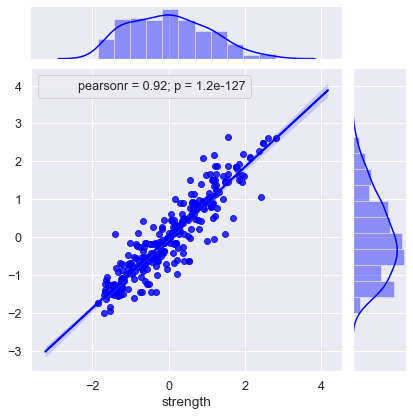

In [38]:
accuracy = build_dtree_model(df_z_2, 'dropping_attr')

In [39]:
results = pd.concat([results, pd.DataFrame({'Method':'Decision Tree drop least attr', 'accuracy': [accuracy]},index={'9'})])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                  Linear Regression  0.633914
2                   Ridge Regression  0.634033
3                   Lasso Regression  0.518566
4  Linear Regression with Polynomial  0.744471
5   Ridge Regression with Polynomial  0.744438
6   Lasso Regression with Polynomial  0.744133
7                      Decision Tree  0.844387
8               Decision Tree K fold  0.871572
9      Decision Tree drop least attr  0.839528

There is no improvement in accuracy from training to testing data. Still overfit model.

### <font color=blue>3.4 DTree Model pruning</font>

In [40]:
# independent and dependent variables
X = filled_outliers_df_z.iloc[:,0:8]
y = filled_outliers_df_z.iloc[:,8]

# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

# Regularizing the Decision tree classifier and fitting the model
reg_dt_model = DecisionTreeRegressor( max_depth = 11,random_state=1,min_samples_leaf=5)
reg_dt_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=11, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [41]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
cement        0.358305
slag          0.083656
ash           0.002291
water         0.125286
superplastic  0.020783
coarseagg     0.033610
fineagg       0.032424
age           0.343644


Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')


Text(0.5, 0, 'Relative Importance')

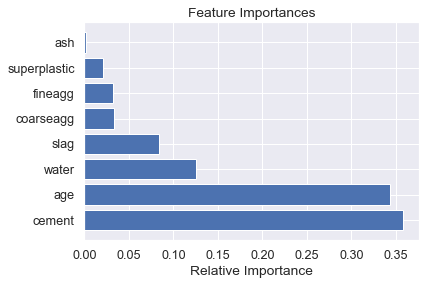

In [42]:
# View a list of the features and their importance scores
tmp_df = concrete_df.copy()
importances = reg_dt_model.feature_importances_
indices = np.argsort(importances)[::-1][:15]
a = tmp_df.columns[:]
print (a)
features= a.drop('strength',1)
#plot it
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

**Observations:**
* ash, coarseagg and fineagg attributes are less important attributes

In [43]:
y_pred = reg_dt_model.predict(X_test)
print('Performance on training data using DT:',reg_dt_model.score(X_train,y_train))
print('Performance on testing data using DT:',reg_dt_model.score(X_test,y_test))
acc_RDT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RDT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.9150317859308273
Performance on testing data using DT: 0.8134939586296608
Accuracy DT:  0.8134939586296608
MSE:  0.194686232032245


In [44]:
results = pd.concat([results, pd.DataFrame({'Method':'Pruned Decision Tree', 'accuracy': [acc_RDT]},index={'10'})])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                   Linear Regression  0.633914
2                    Ridge Regression  0.634033
3                    Lasso Regression  0.518566
4   Linear Regression with Polynomial  0.744471
5    Ridge Regression with Polynomial  0.744438
6    Lasso Regression with Polynomial  0.744133
7                       Decision Tree  0.844387
8                Decision Tree K fold  0.871572
9       Decision Tree drop least attr  0.839528
10               Pruned Decision Tree  0.813494

### <font color=blue>3.5 Pruned Decision Tree K fold</font>

In [45]:
results = kfold_cross_validation('Pruned Decision Tree K fold', '11', results, reg_dt_model)

Kfold Average accuracy:  0.8217448000633109
Kfold Standard Deviation:  0.03905488937726529


In [46]:
results

Method  accuracy
1                   Linear Regression  0.633914
2                    Ridge Regression  0.634033
3                    Lasso Regression  0.518566
4   Linear Regression with Polynomial  0.744471
5    Ridge Regression with Polynomial  0.744438
6    Lasso Regression with Polynomial  0.744133
7                       Decision Tree  0.844387
8                Decision Tree K fold  0.871572
9       Decision Tree drop least attr  0.839528
10               Pruned Decision Tree  0.813494
11        Pruned Decision Tree K fold  0.821745

### <font color=blue>3.6 Pruned Decision Tree by dropping least important attributes</font>

In [47]:
X = filled_outliers_df_z.iloc[:, [0, 1, 2, 3, 7]]
y = filled_outliers_df_z.iloc[:,8]
    
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

# Regularizing the Decision tree classifier and fitting the model
reg_dt_model = DecisionTreeRegressor( max_depth = 4,random_state=1,min_samples_leaf=5)
reg_dt_model.fit(X_train, y_train)

y_pred = reg_dt_model.predict(X_test)
print('Performance on training data using DT:',reg_dt_model.score(X_train,y_train))
print('Performance on testing data using DT:',reg_dt_model.score(X_test,y_test))
acc_RDT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RDT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

results = pd.concat([results, pd.DataFrame({'Method':'Pruned Decision Tree drop least attr', 'accuracy': [acc_RDT]},index={'12'})])
results = results[['Method', 'accuracy']]

Performance on training data using DT: 0.7205699808137814
Performance on testing data using DT: 0.6733175917472254
Accuracy DT:  0.6733175917472254
MSE:  0.3410107611884948


In [48]:
results

Method  accuracy
1                      Linear Regression  0.633914
2                       Ridge Regression  0.634033
3                       Lasso Regression  0.518566
4      Linear Regression with Polynomial  0.744471
5       Ridge Regression with Polynomial  0.744438
6       Lasso Regression with Polynomial  0.744133
7                          Decision Tree  0.844387
8                   Decision Tree K fold  0.871572
9          Decision Tree drop least attr  0.839528
10                  Pruned Decision Tree  0.813494
11           Pruned Decision Tree K fold  0.821745
12  Pruned Decision Tree drop least attr  0.673318

* Comparing all models, "Decision Tree with kfold" is giving better results.
* Let us explore the data for hidden clusters using KMeans and PCA component analysis.

# <font color=blue>K Means Clustering</font>

In [49]:
cluster_range = range( 1, 15 )  
cluster_errors = []
df = concrete_df.copy()
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(df)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

num_clusters  cluster_errors
0              1    4.084759e+07
1              2    3.147325e+07
2              3    2.499578e+07
3              4    2.211361e+07
4              5    1.987188e+07
5              6    1.834560e+07
6              7    1.586795e+07
7              8    1.457568e+07
8              9    1.358951e+07
9             10    1.250181e+07
10            11    1.142639e+07
11            12    1.090997e+07
12            13    1.034061e+07
13            14    9.792655e+06

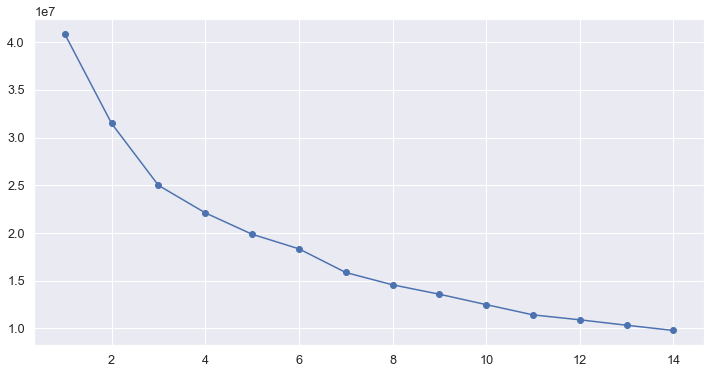

In [50]:

# Elbow plot
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

**Observations:**
* From above elbow plot, with our visual analysis there are likely 4 or 5 good clusters. Let's analysze with 4 clusters.

In [51]:
df = filled_outliers_df.copy()
concrete_df_z = df.apply(zscore)

# k=4
cluster = KMeans( n_clusters = 4, random_state = 2354 )
cluster.fit(concrete_df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2354, tol=0.0001, verbose=0)

In [52]:
# Creating a new column "GROUP" which will hold the cluster id of each record
prediction=cluster.predict(concrete_df_z)
concrete_df_z["GROUP"] = prediction     
# Creating a mirror copy for later re-use instead of building repeatedly
concrete_df_z_copy = concrete_df_z.copy(deep = True)

In [53]:
centroids = cluster.cluster_centers_
centroids

array([[-0.78900708,  1.2270632 , -0.40979533,  0.67658051, -0.49877733,
        -0.27441266, -0.39927182, -0.15419099, -0.42109944],
       [ 1.00799316,  0.45494265, -0.41633755, -0.96978261,  1.01716704,
        -0.68740999,  0.13293642,  0.06007267,  1.16547985],
       [ 0.74445879, -0.78053479, -0.792902  ,  0.66687679, -1.03947212,
         0.45632782, -0.22857476, -0.11600929, -0.24306254],
       [-0.57857036, -0.58904968,  1.12740962, -0.39735349,  0.51330427,
         0.27626272,  0.37693511,  0.1606594 , -0.21555554]])

In [54]:
centroid_df = pd.DataFrame(centroids, columns = list(df) )
centroid_df

cement      slag       ash     water  superplastic  coarseagg   fineagg  \
0 -0.789007  1.227063 -0.409795  0.676581     -0.498777  -0.274413 -0.399272   
1  1.007993  0.454943 -0.416338 -0.969783      1.017167  -0.687410  0.132936   
2  0.744459 -0.780535 -0.792902  0.666877     -1.039472   0.456328 -0.228575   
3 -0.578570 -0.589050  1.127410 -0.397353      0.513304   0.276263  0.376935   

        age  strength  
0 -0.154191 -0.421099  
1  0.060073  1.165480  
2 -0.116009 -0.243063  
3  0.160659 -0.215556

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C2BC66E1C8>,
      dtype=object)

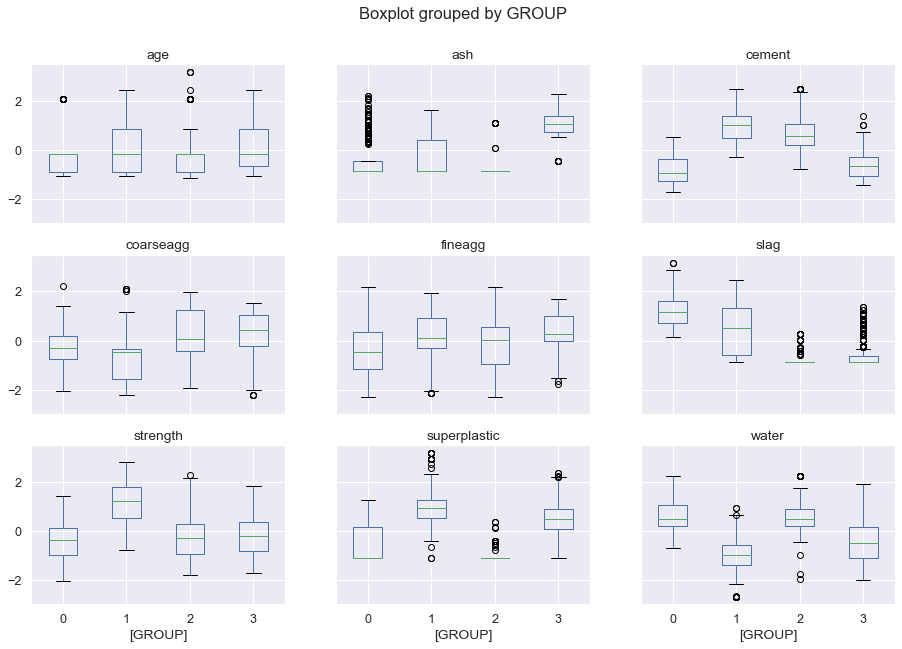

In [55]:
# Instead of numerical values of centroids, dawa a box plot of centroids and data
concrete_df_z.boxplot(by = 'GROUP',  layout=(3,3), figsize=(15, 10))

* Here, None of the dimensions are good predictor of target attribute.
* For all the dimensions every cluster have a similar range of values except in one case.
* We can see that the body of the cluster are overlapping.
* So in k means, though, there are clusters in datasets on different dimensions. But we can not see any distinct characteristics of these clusters which tell us to break data into different clusters and build separate models for them.

**From the previous analysis, among all attributes 'cement' is good predictor. Hence let's visualize clusters within 'cement' attribute.**

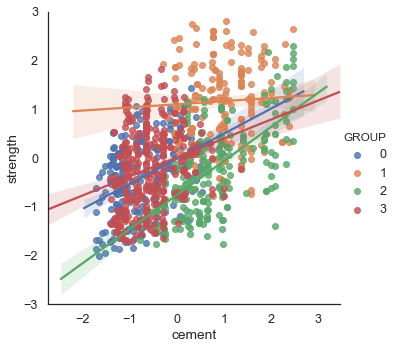

In [56]:
var = 'cement'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concrete_df_z,hue='GROUP')
plot.set(ylim = (-3,3))

**Observation:**
Body of 4 clusters are overlapping. Hence cannnot separate the data into multiple clusters using KMeans. Hence proceed with PCA analysis with this 4 group.

In [57]:
# Kmeans clustering is not helping at all. Let's try PRINCIPAL COMPONENT ANALYSIS

# Apply PCA for each group
group = []
group.append(concrete_df_z[concrete_df_z['GROUP']==0])
group.append(concrete_df_z[concrete_df_z['GROUP']==1])
group.append(concrete_df_z[concrete_df_z['GROUP']==2])
group.append(concrete_df_z[concrete_df_z['GROUP']==3])

cum_var_exp:  [0.28287651 0.52943644 0.69788728 0.81314801 0.90042544 0.96104819
 0.99521375 1.        ]


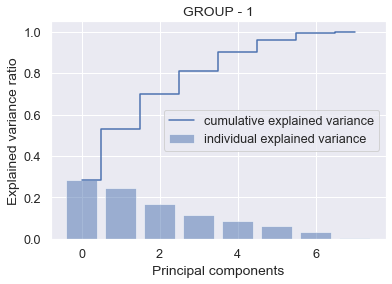

cum_var_exp:  [0.26817399 0.46596523 0.63111915 0.78557512 0.89251981 0.96599536
 0.99084302 1.        ]


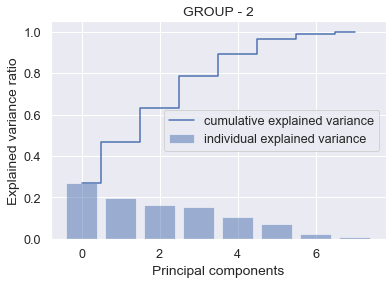

cum_var_exp:  [0.39533499 0.67424589 0.87446818 0.95220067 0.97268829 0.98927072
 0.9956982  1.        ]


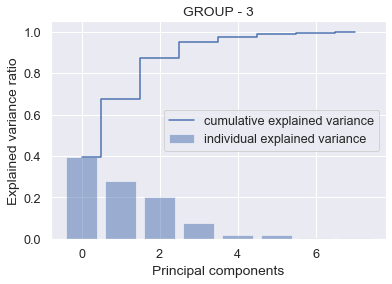

cum_var_exp:  [0.30902581 0.5471504  0.70593678 0.82658987 0.90963285 0.96610824
 0.99680394 1.        ]


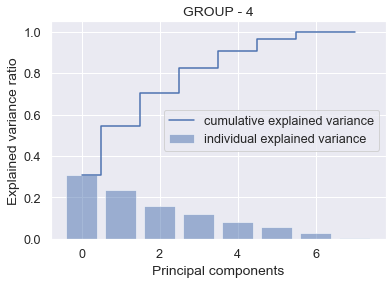

In [58]:
def pca_analysis(indx):
    independent_attr = group[indx].drop(['strength', 'GROUP'] , axis = 1)
    dependent_attr = np.array(group[indx].pop('strength'))
    
    # pca = PCA(4)
    # group_projected = pca.fit_transform(independent_attr)  Reason for avoiding this is the PCA will 
    # automatically convert data to z scores which is already done. Hence doing the steps of PCA one by one

    cov_matrix = np.cov(independent_attr, rowvar=False)
    np.linalg.eig(cov_matrix)

    eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)
    eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

    # Sort the (eigenvalue, eigenvector) pairs from lowest to highest with respect to eigenvalue
    eig_pairs.sort()
    eig_pairs.reverse()    # reverses the sorted pairs from increasing value of eigenvalue to lowest

    # Extract the descending ordered eigenvalues and eigenvectors
    eigvalues_sort = [eig_pairs[index][0] for index in range(len(eigenvalues))]
    eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]
    
    tot = sum(eigenvalues)
    var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
    # eigen vector... there will be 4 entries as there are 4 eigen vectors)

    cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
    # cumulative reaching almost 100%

    print ('cum_var_exp: ', cum_var_exp)
    
    plt_title = 'GROUP - ' + str(indx+1)
    plt.bar(range(0, 8), var_explained, alpha=0.5, align='center', label='individual explained variance')
    plt.step(range(0,8),cum_var_exp, where= 'mid', label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.title(plt_title)
    plt.legend(loc = 'best')
    plt.show()

for indx in range(4):
    pca_analysis(indx)
    

In [59]:
# Now apply and see whether DT with kfold improves the performance
dtree_model = DecisionTreeRegressor()
results = kfold_cross_validation('Decision Tree K fold with PCA','13', results, dtree_model)

Kfold Average accuracy:  0.868703975961407
Kfold Standard Deviation:  0.037673940973947155


In [60]:
results

Method  accuracy
1                      Linear Regression  0.633914
2                       Ridge Regression  0.634033
3                       Lasso Regression  0.518566
4      Linear Regression with Polynomial  0.744471
5       Ridge Regression with Polynomial  0.744438
6       Lasso Regression with Polynomial  0.744133
7                          Decision Tree  0.844387
8                   Decision Tree K fold  0.871572
9          Decision Tree drop least attr  0.839528
10                  Pruned Decision Tree  0.813494
11           Pruned Decision Tree K fold  0.821745
12  Pruned Decision Tree drop least attr  0.673318
13         Decision Tree K fold with PCA  0.868704

**There is no improvement in the accuracy, infact 'DT with PCA' accuracy score is dropped compared to DT with kfold'.**

### <font color=blue>Random Forest Regressor</font>

In [61]:
df = filled_outliers_df.copy()
concrete_df_z = df.apply(zscore)
X = concrete_df_z.iloc[:,0:8]
y = concrete_df_z.iloc[:,8]
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [62]:
model=RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Performance on training data using RFR:',model.score(X_train,y_train))
print('Performance on testing data using RFR:',model.score(X_test,y_test))
acc_RFR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RFR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

results = pd.concat([results, pd.DataFrame({'Method':'Random Forest Regressor', 'accuracy': [acc_RFR]},index={'14'})])
results = results[['Method', 'accuracy']]

Performance on training data using RFR: 0.9727446382156087
Performance on testing data using RFR: 0.9017953646164554
Accuracy DT:  0.9017953646164554
MSE:  0.10251190948264563


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [63]:
results

Method  accuracy
1                      Linear Regression  0.633914
2                       Ridge Regression  0.634033
3                       Lasso Regression  0.518566
4      Linear Regression with Polynomial  0.744471
5       Ridge Regression with Polynomial  0.744438
6       Lasso Regression with Polynomial  0.744133
7                          Decision Tree  0.844387
8                   Decision Tree K fold  0.871572
9          Decision Tree drop least attr  0.839528
10                  Pruned Decision Tree  0.813494
11           Pruned Decision Tree K fold  0.821745
12  Pruned Decision Tree drop least attr  0.673318
13         Decision Tree K fold with PCA  0.868704
14               Random Forest Regressor  0.901795

**Observation:** <br> There is an improvement in accuracy score using Random Forest Regressor algorithm.

In [64]:
results = kfold_cross_validation('Random Forest Regressor with Kfold', '15', results, model)
results

Kfold Average accuracy:  0.9044480937477776
Kfold Standard Deviation:  0.025334014012201003


Method  accuracy
1                      Linear Regression  0.633914
2                       Ridge Regression  0.634033
3                       Lasso Regression  0.518566
4      Linear Regression with Polynomial  0.744471
5       Ridge Regression with Polynomial  0.744438
6       Lasso Regression with Polynomial  0.744133
7                          Decision Tree  0.844387
8                   Decision Tree K fold  0.871572
9          Decision Tree drop least attr  0.839528
10                  Pruned Decision Tree  0.813494
11           Pruned Decision Tree K fold  0.821745
12  Pruned Decision Tree drop least attr  0.673318
13         Decision Tree K fold with PCA  0.868704
14               Random Forest Regressor  0.901795
15    Random Forest Regressor with Kfold  0.904448

In [65]:
# Gradiant Boosting Regressor

model=GradientBoostingRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Performance on training data using GBR:',model.score(X_train,y_train))
print('Performance on testing data using GBR:',model.score(X_test,y_test))

acc_GBR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_GBR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

results = pd.concat([results, pd.DataFrame({'Method':'Gradient Boosting Regressor', 'accuracy': [acc_GBR]},index={'16'})])
results = results[['Method', 'accuracy']]
results

Performance on training data using GBR: 0.9430469892492805
Performance on testing data using GBR: 0.8915746555168158
Accuracy DT:  0.8915746555168157
MSE:  0.11318090083909929


Method  accuracy
1                      Linear Regression  0.633914
2                       Ridge Regression  0.634033
3                       Lasso Regression  0.518566
4      Linear Regression with Polynomial  0.744471
5       Ridge Regression with Polynomial  0.744438
6       Lasso Regression with Polynomial  0.744133
7                          Decision Tree  0.844387
8                   Decision Tree K fold  0.871572
9          Decision Tree drop least attr  0.839528
10                  Pruned Decision Tree  0.813494
11           Pruned Decision Tree K fold  0.821745
12  Pruned Decision Tree drop least attr  0.673318
13         Decision Tree K fold with PCA  0.868704
14               Random Forest Regressor  0.901795
15    Random Forest Regressor with Kfold  0.904448
16           Gradient Boosting Regressor  0.891575

In [66]:
results = kfold_cross_validation('Gradient Boosting Regressor with kfold', '17', results, model)
results

Kfold Average accuracy:  0.8993528589769302
Kfold Standard Deviation:  0.01680133410763312


Method  accuracy
1                        Linear Regression  0.633914
2                         Ridge Regression  0.634033
3                         Lasso Regression  0.518566
4        Linear Regression with Polynomial  0.744471
5         Ridge Regression with Polynomial  0.744438
6         Lasso Regression with Polynomial  0.744133
7                            Decision Tree  0.844387
8                     Decision Tree K fold  0.871572
9            Decision Tree drop least attr  0.839528
10                    Pruned Decision Tree  0.813494
11             Pruned Decision Tree K fold  0.821745
12    Pruned Decision Tree drop least attr  0.673318
13           Decision Tree K fold with PCA  0.868704
14                 Random Forest Regressor  0.901795
15      Random Forest Regressor with Kfold  0.904448
16             Gradient Boosting Regressor  0.891575
17  Gradient Boosting Regressor with kfold  0.899353

### <font color=blue>Ada Boosting Regressor</font>

In [67]:
model=AdaBoostRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Performance on training data using ABR:',model.score(X_train,y_train))
print('Performance on testing data using ABR:',model.score(X_test,y_test))

acc_ABR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_ABR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

results = pd.concat([results, pd.DataFrame({'Method':'Ada Boosting Regressor', 'accuracy': [acc_ABR]},index={'18'})])
results = results[['Method', 'accuracy']]
results

Performance on training data using ABR: 0.8191258516133922
Performance on testing data using ABR: 0.7695035986931283
Accuracy DT:  0.7695035986931283
MSE:  0.24060601757302455


Method  accuracy
1                        Linear Regression  0.633914
2                         Ridge Regression  0.634033
3                         Lasso Regression  0.518566
4        Linear Regression with Polynomial  0.744471
5         Ridge Regression with Polynomial  0.744438
6         Lasso Regression with Polynomial  0.744133
7                            Decision Tree  0.844387
8                     Decision Tree K fold  0.871572
9            Decision Tree drop least attr  0.839528
10                    Pruned Decision Tree  0.813494
11             Pruned Decision Tree K fold  0.821745
12    Pruned Decision Tree drop least attr  0.673318
13           Decision Tree K fold with PCA  0.868704
14                 Random Forest Regressor  0.901795
15      Random Forest Regressor with Kfold  0.904448
16             Gradient Boosting Regressor  0.891575
17  Gradient Boosting Regressor with kfold  0.899353
18                  Ada Boosting Regressor  0.769504

In [68]:
results = kfold_cross_validation('Ada Boosting Regressor with kfold', '19', results, model)
results

Kfold Average accuracy:  0.7683754267144491
Kfold Standard Deviation:  0.032693474916757934


Method  accuracy
1                        Linear Regression  0.633914
2                         Ridge Regression  0.634033
3                         Lasso Regression  0.518566
4        Linear Regression with Polynomial  0.744471
5         Ridge Regression with Polynomial  0.744438
6         Lasso Regression with Polynomial  0.744133
7                            Decision Tree  0.844387
8                     Decision Tree K fold  0.871572
9            Decision Tree drop least attr  0.839528
10                    Pruned Decision Tree  0.813494
11             Pruned Decision Tree K fold  0.821745
12    Pruned Decision Tree drop least attr  0.673318
13           Decision Tree K fold with PCA  0.868704
14                 Random Forest Regressor  0.901795
15      Random Forest Regressor with Kfold  0.904448
16             Gradient Boosting Regressor  0.891575
17  Gradient Boosting Regressor with kfold  0.899353
18                  Ada Boosting Regressor  0.769504
19       Ada Boosting Regressor with kfold  0.768375

### <font color=blue>Bagging Regressor</font>

In [69]:
model=BaggingRegressor()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print('Performance on training data using GBR:',model.score(X_train,y_train))
print('Performance on testing data using GBR:',model.score(X_test,y_test))

acc_BR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_BR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

results = pd.concat([results, pd.DataFrame({'Method':'Bagging Regressor', 'accuracy': [acc_BR]},index={'20'})])
results = results[['Method', 'accuracy']]
results

Performance on training data using GBR: 0.9714681581775412
Performance on testing data using GBR: 0.8891293533986425
Accuracy DT:  0.8891293533986426
MSE:  0.11573345437607702


Method  accuracy
1                        Linear Regression  0.633914
2                         Ridge Regression  0.634033
3                         Lasso Regression  0.518566
4        Linear Regression with Polynomial  0.744471
5         Ridge Regression with Polynomial  0.744438
6         Lasso Regression with Polynomial  0.744133
7                            Decision Tree  0.844387
8                     Decision Tree K fold  0.871572
9            Decision Tree drop least attr  0.839528
10                    Pruned Decision Tree  0.813494
11             Pruned Decision Tree K fold  0.821745
12    Pruned Decision Tree drop least attr  0.673318
13           Decision Tree K fold with PCA  0.868704
14                 Random Forest Regressor  0.901795
15      Random Forest Regressor with Kfold  0.904448
16             Gradient Boosting Regressor  0.891575
17  Gradient Boosting Regressor with kfold  0.899353
18                  Ada Boosting Regressor  0.769504
19       Ada Boosting Regressor with kfold  0.768375
20                       Bagging Regressor  0.889129

In [70]:
results = kfold_cross_validation('Bagging Regressor with kfold', '21', results, model)
results

Kfold Average accuracy:  0.8978140865432781
Kfold Standard Deviation:  0.029698156646181258


Method  accuracy
1                        Linear Regression  0.633914
2                         Ridge Regression  0.634033
3                         Lasso Regression  0.518566
4        Linear Regression with Polynomial  0.744471
5         Ridge Regression with Polynomial  0.744438
6         Lasso Regression with Polynomial  0.744133
7                            Decision Tree  0.844387
8                     Decision Tree K fold  0.871572
9            Decision Tree drop least attr  0.839528
10                    Pruned Decision Tree  0.813494
11             Pruned Decision Tree K fold  0.821745
12    Pruned Decision Tree drop least attr  0.673318
13           Decision Tree K fold with PCA  0.868704
14                 Random Forest Regressor  0.901795
15      Random Forest Regressor with Kfold  0.904448
16             Gradient Boosting Regressor  0.891575
17  Gradient Boosting Regressor with kfold  0.899353
18                  Ada Boosting Regressor  0.769504
19       Ada Boosting Regressor with kfold  0.768375
20                       Bagging Regressor  0.889129
21            Bagging Regressor with kfold  0.897814

### <font color=blue>KNN Regressor</font>

Text(0, 0.5, 'Mean error')

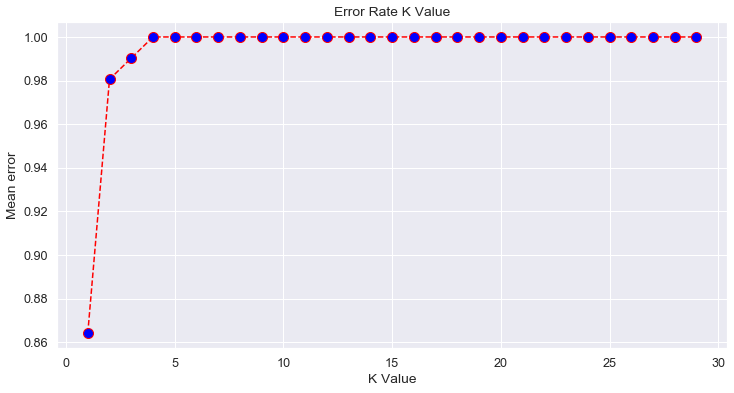

In [71]:
error=[]
for i in range(1,30):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i!=y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,30),error,color='red', linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean error')

In [72]:
#k=3
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [73]:
y_pred = model.predict(X_test)
print('Performance on training data using KNNR:',model.score(X_train,y_train))
print('Performance on testing data using KNNR:',model.score(X_test,y_test))

acc_K=metrics.r2_score(y_test, y_pred)
print('Accuracy KNNR: ',acc_K)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

results = pd.concat([results, pd.DataFrame({'Method':'KNN Regressor', 'accuracy': [acc_K]},index={'22'})])
results = results[['Method', 'accuracy']]
results

Performance on training data using KNNR: 0.8902196318573777
Performance on testing data using KNNR: 0.8078817663272165
Accuracy KNNR:  0.8078817663272165
MSE:  0.20054457616295157


Method  accuracy
1                        Linear Regression  0.633914
2                         Ridge Regression  0.634033
3                         Lasso Regression  0.518566
4        Linear Regression with Polynomial  0.744471
5         Ridge Regression with Polynomial  0.744438
6         Lasso Regression with Polynomial  0.744133
7                            Decision Tree  0.844387
8                     Decision Tree K fold  0.871572
9            Decision Tree drop least attr  0.839528
10                    Pruned Decision Tree  0.813494
11             Pruned Decision Tree K fold  0.821745
12    Pruned Decision Tree drop least attr  0.673318
13           Decision Tree K fold with PCA  0.868704
14                 Random Forest Regressor  0.901795
15      Random Forest Regressor with Kfold  0.904448
16             Gradient Boosting Regressor  0.891575
17  Gradient Boosting Regressor with kfold  0.899353
18                  Ada Boosting Regressor  0.769504
19       Ada Boosting Regressor with kfold  0.768375
20                       Bagging Regressor  0.889129
21            Bagging Regressor with kfold  0.897814
22                           KNN Regressor  0.807882

In [74]:
results = kfold_cross_validation('KNN Regressor with kfold', '23', results, model)
results

Kfold Average accuracy:  0.7947547097467347
Kfold Standard Deviation:  0.03961462765692188


Method  accuracy
1                        Linear Regression  0.633914
2                         Ridge Regression  0.634033
3                         Lasso Regression  0.518566
4        Linear Regression with Polynomial  0.744471
5         Ridge Regression with Polynomial  0.744438
6         Lasso Regression with Polynomial  0.744133
7                            Decision Tree  0.844387
8                     Decision Tree K fold  0.871572
9            Decision Tree drop least attr  0.839528
10                    Pruned Decision Tree  0.813494
11             Pruned Decision Tree K fold  0.821745
12    Pruned Decision Tree drop least attr  0.673318
13           Decision Tree K fold with PCA  0.868704
14                 Random Forest Regressor  0.901795
15      Random Forest Regressor with Kfold  0.904448
16             Gradient Boosting Regressor  0.891575
17  Gradient Boosting Regressor with kfold  0.899353
18                  Ada Boosting Regressor  0.769504
19       Ada Boosting Regressor with kfold  0.768375
20                       Bagging Regressor  0.889129
21            Bagging Regressor with kfold  0.897814
22                           KNN Regressor  0.807882
23                KNN Regressor with kfold  0.794755

In [75]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using SVR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using SVR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_S=metrics.r2_score(y_test, y_pred)
print('Accuracy SVR: ',acc_S)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

results = pd.concat([results, pd.DataFrame({'Method':'SVR', 'accuracy': [acc_S]},index={'24'})])
results = results[['Method', 'accuracy']]
results

Performance on training data using SVR: 0.7195312919938222
Performance on testing data using SVR: 0.6932035001931365
Accuracy SVR:  0.6932035001931365
MSE:  0.32025265299303374


Method  accuracy
1                        Linear Regression  0.633914
2                         Ridge Regression  0.634033
3                         Lasso Regression  0.518566
4        Linear Regression with Polynomial  0.744471
5         Ridge Regression with Polynomial  0.744438
6         Lasso Regression with Polynomial  0.744133
7                            Decision Tree  0.844387
8                     Decision Tree K fold  0.871572
9            Decision Tree drop least attr  0.839528
10                    Pruned Decision Tree  0.813494
11             Pruned Decision Tree K fold  0.821745
12    Pruned Decision Tree drop least attr  0.673318
13           Decision Tree K fold with PCA  0.868704
14                 Random Forest Regressor  0.901795
15      Random Forest Regressor with Kfold  0.904448
16             Gradient Boosting Regressor  0.891575
17  Gradient Boosting Regressor with kfold  0.899353
18                  Ada Boosting Regressor  0.769504
19       Ada Boosting Regressor with kfold  0.768375
20                       Bagging Regressor  0.889129
21            Bagging Regressor with kfold  0.897814
22                           KNN Regressor  0.807882
23                KNN Regressor with kfold  0.794755
24                                     SVR  0.693204

In [76]:
results = kfold_cross_validation('SVR with kfold', '25', results, model)
results

Kfold Average accuracy:  0.6971192327136142
Kfold Standard Deviation:  0.036742110058929286


Method  accuracy
1                        Linear Regression  0.633914
2                         Ridge Regression  0.634033
3                         Lasso Regression  0.518566
4        Linear Regression with Polynomial  0.744471
5         Ridge Regression with Polynomial  0.744438
6         Lasso Regression with Polynomial  0.744133
7                            Decision Tree  0.844387
8                     Decision Tree K fold  0.871572
9            Decision Tree drop least attr  0.839528
10                    Pruned Decision Tree  0.813494
11             Pruned Decision Tree K fold  0.821745
12    Pruned Decision Tree drop least attr  0.673318
13           Decision Tree K fold with PCA  0.868704
14                 Random Forest Regressor  0.901795
15      Random Forest Regressor with Kfold  0.904448
16             Gradient Boosting Regressor  0.891575
17  Gradient Boosting Regressor with kfold  0.899353
18                  Ada Boosting Regressor  0.769504
19       Ada Boosting Regressor with kfold  0.768375
20                       Bagging Regressor  0.889129
21            Bagging Regressor with kfold  0.897814
22                           KNN Regressor  0.807882
23                KNN Regressor with kfold  0.794755
24                                     SVR  0.693204
25                          SVR with kfold  0.697119

### <font color=blue>Ensemeble with KNN Regressor, Linear Regression and SVM</font>

In [77]:
LR=LinearRegression()
KN=KNeighborsRegressor(n_neighbors=3)
SVM=svm.SVR(kernel='linear')

evc=VotingRegressor(estimators=[('LR',LR),('KN',KN),('SVM',SVM)])
evc.fit(X_train, y_train)

y_pred = evc.predict(X_test)
print('Performance on training data using ensemble:',evc.score(X_train,y_train))
print('Performance on testing data using ensemble:',evc.score(X_test,y_test))

acc_E=metrics.r2_score(y_test, y_pred)
print('Accuracy ensemble: ',acc_E)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

results = pd.concat([results, pd.DataFrame({'Method':'Ensemeble with voting', 'accuracy': [acc_E]},index={'26'})])
results = results[['Method', 'accuracy']]
results

Performance on training data using ensemble: 0.8213604308836657
Performance on testing data using ensemble: 0.7849191766894734
Accuracy ensemble:  0.7849191766894734
MSE:  0.22451430937603256


Method  accuracy
1                        Linear Regression  0.633914
2                         Ridge Regression  0.634033
3                         Lasso Regression  0.518566
4        Linear Regression with Polynomial  0.744471
5         Ridge Regression with Polynomial  0.744438
6         Lasso Regression with Polynomial  0.744133
7                            Decision Tree  0.844387
8                     Decision Tree K fold  0.871572
9            Decision Tree drop least attr  0.839528
10                    Pruned Decision Tree  0.813494
11             Pruned Decision Tree K fold  0.821745
12    Pruned Decision Tree drop least attr  0.673318
13           Decision Tree K fold with PCA  0.868704
14                 Random Forest Regressor  0.901795
15      Random Forest Regressor with Kfold  0.904448
16             Gradient Boosting Regressor  0.891575
17  Gradient Boosting Regressor with kfold  0.899353
18                  Ada Boosting Regressor  0.769504
19       Ada Boosting Regressor with kfold  0.768375
20                       Bagging Regressor  0.889129
21            Bagging Regressor with kfold  0.897814
22                           KNN Regressor  0.807882
23                KNN Regressor with kfold  0.794755
24                                     SVR  0.693204
25                          SVR with kfold  0.697119
26                   Ensemeble with voting  0.784919

In [78]:
results = kfold_cross_validation('Ensemeble with voting with kfold', '27', results, evc)
results

Kfold Average accuracy:  0.7803291490734494
Kfold Standard Deviation:  0.029918532582796722


Method  accuracy
1                        Linear Regression  0.633914
2                         Ridge Regression  0.634033
3                         Lasso Regression  0.518566
4        Linear Regression with Polynomial  0.744471
5         Ridge Regression with Polynomial  0.744438
6         Lasso Regression with Polynomial  0.744133
7                            Decision Tree  0.844387
8                     Decision Tree K fold  0.871572
9            Decision Tree drop least attr  0.839528
10                    Pruned Decision Tree  0.813494
11             Pruned Decision Tree K fold  0.821745
12    Pruned Decision Tree drop least attr  0.673318
13           Decision Tree K fold with PCA  0.868704
14                 Random Forest Regressor  0.901795
15      Random Forest Regressor with Kfold  0.904448
16             Gradient Boosting Regressor  0.891575
17  Gradient Boosting Regressor with kfold  0.899353
18                  Ada Boosting Regressor  0.769504
19       Ada Boosting Regressor with kfold  0.768375
20                       Bagging Regressor  0.889129
21            Bagging Regressor with kfold  0.897814
22                           KNN Regressor  0.807882
23                KNN Regressor with kfold  0.794755
24                                     SVR  0.693204
25                          SVR with kfold  0.697119
26                   Ensemeble with voting  0.784919
27        Ensemeble with voting with kfold  0.780329

**Inferences by looking at accuracy of all models:**
* From the above table, Random Forest Regressor (89%), Random Forest Regressor k fold(90%), Gradient Boost Regressor(89%), Gradient Boost Regressor k fold(90%), Bagging Regressor(89%), Bagging Regressor kfold(89%) are giving better results as compared to other models.
* As the dataset have different gaussians, apply Bootstrap sampling technique to resampling large numbers of smaller samples of the same size repeatedly - on RFR (Random Forest Regressor) and GBR(Gradient Boost Regressor) models.

In [79]:
concrete_XY = X.join(y)

### <font color=blue>Bootstrap Sampling with GBR</font>

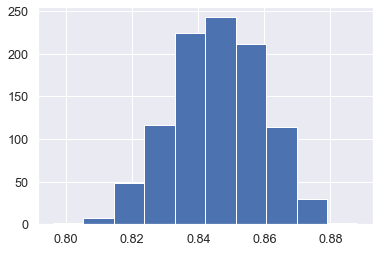

95.0 confidence interval 81.9% and 87.1%


In [80]:
values = concrete_XY.values
# Number of bootstrap samples to create
n_iterations = 1000        
# size of a bootstrap sample
n_size = int(len(concrete_df_z) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    gbmTree = GradientBoostingRegressor(n_estimators=50)
    # fit against independent variables and corresponding target values
    gbmTree.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = gbmTree.score(test[:, :-1] , y_test)
    predictions = gbmTree.predict(test[:, :-1])  

    stats.append(score)

# plot scores
def plot_score(stats):
    pyplot.hist(stats)
    pyplot.show()

    # confidence intervals
    alpha = 0.95                             # for 95% confidence 
    p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
    lower = max(0.0, np.percentile(stats, p))  
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = min(1.0, np.percentile(stats, p))
    print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

plot_score(stats)

### <font color=blue>Bootstrap Sampling with RFR</font>

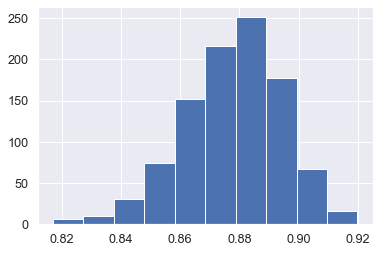

95.0 confidence interval 84.2% and 90.7%


In [81]:
values = concrete_XY.values
# Number of bootstrap samples to create
n_iterations = 1000        
# size of a bootstrap sample
n_size = int(len(concrete_df_z) * 1)    

rfTree = RandomForestRegressor(n_estimators=100)

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
    # fit against independent variables and corresponding target values
    rfTree.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = rfTree.score(test[:, :-1] , y_test)
    predictions = rfTree.predict(test[:, :-1])  

    stats.append(score)

plot_score(stats)

The bootstrap random forest regressor model performance is between 84%-90.7% which is better than other classification algorithms.

In [82]:
# Divide the data into Train, validation, test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

### Steps involved:
1. Fit the model with Train dataset.
2. Validate the model with valid dataset.
3. Hypertuning the model using GridSearchCV and RandomizedSearchCV techniques
4. Validate with valid dataset.
5. Test with Test dataset.

In [83]:
# Step - 1:
rfTree.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [84]:
# Step - 2:
y_pred = rfTree.predict(X_val)
print('Performance on training data using Random Forest Regressor:',rfTree.score(X_train,y_train))
print('Performance on validation data using Random Forest Regressor:',rfTree.score(X_val,y_val))

accuracy=metrics.r2_score(y_val, y_pred)
print('Accuracy: ',accuracy)
print('MSE: ',metrics.mean_squared_error(y_val, y_pred))

Performance on training data using Random Forest Regressor: 0.9816073843044514
Performance on validation data using Random Forest Regressor: 0.8842928303705528
Accuracy:  0.8842928303705528
MSE:  0.12223897785041407


**Step - 3: Hyper parameter tuning**

In [85]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
print(rfTree.get_params())

Parameters currently in use:

{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [86]:
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

param_grid = {"max_depth": [3, None],
              "max_features": ['auto', 'sqrt'],
              "min_samples_split": [2, 5, 10],
              "min_samples_leaf": [1, 2, 4],
              "bootstrap": [True, False]}


# <font color=blue>Applying RandomSearchCV</font>

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# run randomized search
samples = 10  # number of random samples 
randomCV = RandomizedSearchCV(rfTree, param_distributions=param_grid, n_iter=samples) #default cv = 3

In [88]:
randomCV.fit(X, y)
 
print(randomCV.best_params_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}


In [89]:
randomCV.cv_results_['mean_test_score']

array([0.60664667, 0.60807322, 0.87365736, 0.60717405, 0.83783897,
       0.83622949, 0.8635581 , 0.56637498, 0.60713909, 0.86974979])

**Inference:** Using Randomized Search CV technique to tune the Randon Forest Regressor, giving performance of 88%.

In [90]:
# Computing the performance of tuned model on train.,valid and test datasets.
print('Performance on training data using RandomizedSearch CV on Randon Forest Regressor:',randomCV.score(X_train,y_train))
print('Performance on validation data RandomizedSearchCV on Random Forest Regressor:',randomCV.score(X_val,y_val))
print('Performance on test data RandomizedSearchCV on Random Forest Regressor:',randomCV.score(X_test,y_test))

y_pred = randomCV.predict(X_test)
accuracy=metrics.r2_score(y_test, y_pred)
print('Accuracy: ',accuracy)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using RandomizedSearch CV on Randon Forest Regressor: 0.954930976670905
Performance on validation data RandomizedSearchCV on Random Forest Regressor: 0.9451618499280542
Performance on test data RandomizedSearchCV on Random Forest Regressor: 0.9652861896379414
Accuracy:  0.9652861896379414
MSE:  0.036663380236219


In [91]:
## Performance of the RandomizedSearchCV applied RFR is showing very good results.
## Lets apply kfold

In [92]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(randomCV,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
    
print('Kfold Average accuracy: ',accuracy)
print('Kfold Standard Deviation: ',results1.std())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, Fut

Kfold Average accuracy:  0.900067650530087
Kfold Standard Deviation:  0.028792173392424975


In [93]:
results = pd.concat([results, pd.DataFrame({'Method':'RFR by applying RandomizedSearchCV with kfold', 'accuracy': [accuracy]},index={'28'})])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                               Linear Regression  0.633914
2                                Ridge Regression  0.634033
3                                Lasso Regression  0.518566
4               Linear Regression with Polynomial  0.744471
5                Ridge Regression with Polynomial  0.744438
6                Lasso Regression with Polynomial  0.744133
7                                   Decision Tree  0.844387
8                            Decision Tree K fold  0.871572
9                   Decision Tree drop least attr  0.839528
10                           Pruned Decision Tree  0.813494
11                    Pruned Decision Tree K fold  0.821745
12           Pruned Decision Tree drop least attr  0.673318
13                  Decision Tree K fold with PCA  0.868704
14                        Random Forest Regressor  0.901795
15             Random Forest Regressor with Kfold  0.904448
16                    Gradient Boosting Regressor  0.891575
17         Gradient Boosting Regressor with kfold  0.899353
18                         Ada Boosting Regressor  0.769504
19              Ada Boosting Regressor with kfold  0.768375
20                              Bagging Regressor  0.889129
21                   Bagging Regressor with kfold  0.897814
22                                  KNN Regressor  0.807882
23                       KNN Regressor with kfold  0.794755
24                                            SVR  0.693204
25                                 SVR with kfold  0.697119
26                          Ensemeble with voting  0.784919
27               Ensemeble with voting with kfold  0.780329
28  RFR by applying RandomizedSearchCV with kfold  0.900068

# <font color=blue>Applying GridSearchCV</font>

In [94]:
# run grid search
gridCV = GridSearchCV(rfTree, param_grid=param_grid)
start = time()
gridCV.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'bootstrap': [True, False], '

In [95]:
gridCV.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [96]:
gridCV.cv_results_['mean_test_score']

array([0.65949348, 0.65285782, 0.65866538, 0.65325858, 0.6541849 ,
       0.66623819, 0.65929798, 0.65802474, 0.66127283, 0.61455625,
       0.61131679, 0.60912618, 0.59653381, 0.60355025, 0.60617819,
       0.60989914, 0.60219822, 0.6024924 , 0.8924944 , 0.88843208,
       0.87624044, 0.88476281, 0.88431725, 0.87392196, 0.87119688,
       0.87015606, 0.86647668, 0.87951246, 0.86907012, 0.84969007,
       0.86443304, 0.86344847, 0.84708665, 0.83430835, 0.83271494,
       0.82955556, 0.56637498, 0.56637498, 0.56637498, 0.56637498,
       0.56637498, 0.56637498, 0.56637498, 0.56637498, 0.56637498,
       0.61089913, 0.60874261, 0.6124038 , 0.60107433, 0.60911407,
       0.60600215, 0.61717124, 0.60280997, 0.60439068, 0.83838106,
       0.83892134, 0.82434712, 0.82408248, 0.82273395, 0.81427102,
       0.82033077, 0.81998105, 0.81610062, 0.89058373, 0.886813  ,
       0.87412662, 0.88159575, 0.88097803, 0.87097721, 0.85615012,
       0.86071062, 0.85895715])

In [97]:
# Computing the performance of tuned model on train.,valid and test datasets.
print('Performance on training data using GridSearch CV on Randon Forest Regressor:',gridCV.score(X_train,y_train))
print('Performance on validation data GridSearchCV on Random Forest Regressor:',gridCV.score(X_val,y_val))
print('Performance on test data GridSearchCV on Random Forest Regressor:',gridCV.score(X_test,y_test))

y_pred = gridCV.predict(X_test)
accuracy=metrics.r2_score(y_test, y_pred)
print('Accuracy: ',accuracy)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GridSearch CV on Randon Forest Regressor: 0.9833559668279404
Performance on validation data GridSearchCV on Random Forest Regressor: 0.9734875587226242
Performance on test data GridSearchCV on Random Forest Regressor: 0.9863138252193463
Accuracy:  0.9863138252193463
MSE:  0.01445480702720251


In [98]:
## Performance of the GridSearchCV applied RFR is showing as overfit. Performing very good at Testing data, and poor in
## validation and test data
## Lets apply kfold

In [99]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(gridCV,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
    
print('Kfold Average accuracy: ',accuracy)
print('Kfold Standard Deviation: ',results1.std())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, Fut

Kfold Average accuracy:  0.9126164618048094
Kfold Standard Deviation:  0.019059751676681495


In [100]:
results = pd.concat([results, pd.DataFrame({'Method':'RFR by applying GridSearchCV with kfold', 'accuracy': [accuracy]},index={'28'})])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                               Linear Regression  0.633914
2                                Ridge Regression  0.634033
3                                Lasso Regression  0.518566
4               Linear Regression with Polynomial  0.744471
5                Ridge Regression with Polynomial  0.744438
6                Lasso Regression with Polynomial  0.744133
7                                   Decision Tree  0.844387
8                            Decision Tree K fold  0.871572
9                   Decision Tree drop least attr  0.839528
10                           Pruned Decision Tree  0.813494
11                    Pruned Decision Tree K fold  0.821745
12           Pruned Decision Tree drop least attr  0.673318
13                  Decision Tree K fold with PCA  0.868704
14                        Random Forest Regressor  0.901795
15             Random Forest Regressor with Kfold  0.904448
16                    Gradient Boosting Regressor  0.891575
17         Gradient Boosting Regressor with kfold  0.899353
18                         Ada Boosting Regressor  0.769504
19              Ada Boosting Regressor with kfold  0.768375
20                              Bagging Regressor  0.889129
21                   Bagging Regressor with kfold  0.897814
22                                  KNN Regressor  0.807882
23                       KNN Regressor with kfold  0.794755
24                                            SVR  0.693204
25                                 SVR with kfold  0.697119
26                          Ensemeble with voting  0.784919
27               Ensemeble with voting with kfold  0.780329
28  RFR by applying RandomizedSearchCV with kfold  0.900068
28        RFR by applying GridSearchCV with kfold  0.912616

# <font color=green>Final Summary :</font>

* Given dataset has lot of clusters with less number of records (1030 in number).
* slag, superplasting, courseagg and age has intersecting gaussians. And also there is 37% of data from superplastic, and 46% of data from slag are '0's.
* Not known on the unit measure of each attribute. Hence applied zscore to bring all attributes into same units.
* Many gausians present for all attributes distributions and also many outliers. To bring down the outliers existence %, replaced outliers with median value.
* Among all model performances, Random Forest regressor is performing 91% with 95% of confidence level.
* After applying RandomizedSearchCV and GridSearchCV hyper parameter tuning techniques, experience the same performance values.

**Hence my recommendation is - "Random Forest Regressor" Model suits for predicting the 'strength' attribute using Concrete independent attributes.** 
